<a href="https://colab.research.google.com/github/shreyab375/Wind-Turbine-Project/blob/main/Wind_Turbines_Project_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement :** Imagine a company wants to expand its services to the wind industry (wind turbines) and gives
you free rein to decide on what to do and how to do it. The company has seen that Engie has an
open data set available online and Engie’s head of Wind Turbines has agreed to take a
meeting with the company in 2 weeks out of curiosity. The company has given you one week to take this
dataset and make the best out of it. The goal is to prove that given this type of data, ML can
create value for a player like Engie. We expect that by the end of the week you can give a
technical presentation to your colleagues at the same company on what results you achieved, how you
achieved them and what interesting aspects you would have researched if you had more
time - first from a technical perspective - and then finally suggest how we can use these
results to convince Engie’s Head of Wind Turbines in the following week.






##**Identified Business Problem Statement:**
The objective is to forecast power output (P) from a wind turbine based on environmental factors such as wind speed, wind direction, outdoor temperature, pressure, humidity, rain, snow, season, and time of day.

##**Proposed Solution:**
A predictive model is developed using machine learning techniques, incorporating features such as wind speed, wind direction, outdoor temperature, pressure, humidity, rain, snow, season, and time of day. The given data containing these variables along with corresponding power output is used to train the model. Various regression algorithms such as linear regression, decision trees, or ensemble methods like random forest is evaluated to find the most accurate model. The trained model will then be used to forecast the power output based on the current environmental conditions. This forecasting capability will aid in optimizing wind turbine operations, scheduling maintenance, and ensuring efficient energy generation.

In [1]:
!python --version

Python 3.10.12


In [2]:
#Import the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
import xgboost as xgb
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV

##Reading the datasets:
The given dataset has details for four different wind turbines having following features:
- Datetime
- Wind Turbine Name
- Pitch_angle: deg
- Active_power: kW
- Reactive Power: KVAr
- Nacelle_angle: deg
- Nacelle_temperature: deg_C
- Wind_speed_1: m/s, First anemometer on the nacelle
- Wind_speed_2: m/s, Second anemometer on the nacelle
- Wind_speed: m/s, Average Wind Speed
- Absolute_wind_direction_corrected: deg
- Vane_position: deg
- Outdoor_temperature: deg_C
- Rotor_speed: rpm
- Rotor_bearing_temperature: deg_C
- Torque: Nm
- Temperature
- Pressure
- Humidity
- Wind Speed
- Wind Direction
- Rain
- Snow


In [3]:
wt1 = pd.read_csv('/content/drive/MyDrive/R80711.csv', header =0)
wt2 = pd.read_csv('/content/drive/MyDrive/R80721.csv')
wt3 = pd.read_csv('/content/drive/MyDrive/R80736.csv')
wt4 = pd.read_csv('/content/drive/MyDrive/R80790.csv')

##Sanity Checks for each of the dataframes

In [4]:
wt1.head()

,Date_time,Date_time_nr,Wind_turbine_name,Ba_avg,P_avg,Q_avg,Ya_avg,Yt_avg,Ws1_avg,Ws2_avg,...,Rs_avg,Rbt_avg,Rm_avg,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h
0,2013-01-01T00:00:00+01:00,1356994800,R80711,-1.00,1072.6500,14.490000,161.44000,12.730000,8.770001,9.160000,...,17.18,28.709999,5690.2798,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,2013-01-01T00:10:00+01:00,1356995400,R80711,-1.00,1061.4301,23.700001,161.44000,14.990000,8.660000,9.120000,...,17.17,28.700001,5632.7202,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,2013-01-01T00:20:00+01:00,1356996000,R80711,-1.00,1144.7900,25.480000,161.44000,21.750000,8.940000,9.450000,...,17.18,28.790001,6071.6899,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,2013-01-01T00:30:00+01:00,1356996600,R80711,-1.00,1183.9800,24.379999,173.41000,23.799999,8.870000,8.979999,...,17.18,28.860001,6279.4702,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,2013-01-01T00:40:00+01:00,1356997200,R80711,-0.98,1317.5500,14.470000,177.89999,17.910000,9.440000,9.510000,...,17.18,28.770000,6988.5698,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


In [5]:
wt2.head()

,Date_time,Date_time_nr,Wind_turbine_name,Ba_avg,P_avg,Q_avg,Ya_avg,Yt_avg,Ws1_avg,Ws2_avg,...,Rs_avg,Rbt_avg,Rm_avg,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h
0,2013-01-01T00:00:00+01:00,1356994800,R80721,-1.01,679.69000,75.389999,165.10001,15.010000,7.13,7.38,...,16.360001,25.889999,3759.9700,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,2013-01-01T00:10:00+01:00,1356995400,R80721,-1.02,867.40997,78.320000,165.10001,20.030001,7.60,7.93,...,17.000000,25.900000,4638.0298,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,2013-01-01T00:20:00+01:00,1356996000,R80721,-1.02,948.92999,83.230003,165.10001,21.410000,7.90,8.13,...,17.120001,25.900000,5046.3501,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,2013-01-01T00:30:00+01:00,1356996600,R80721,-1.03,1099.06010,82.699997,165.10001,22.020000,8.54,8.68,...,17.170000,25.930000,5831.7202,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,2013-01-01T00:40:00+01:00,1356997200,R80721,-1.03,1003.62000,86.129997,165.10001,22.350000,8.49,8.60,...,17.090000,25.990000,5341.3301,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


In [6]:
wt3.head()

,Date_time,Date_time_nr,Wind_turbine_name,Ba_avg,P_avg,Q_avg,Ya_avg,Yt_avg,Ws1_avg,Ws2_avg,...,Rs_avg,Rbt_avg,Rm_avg,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h
0,2013-01-01T00:00:00+01:00,1356994800,R80736,-1.0,801.22998,67.559998,286.00000,20.129999,7.52,7.76,...,16.950001,26.049999,4298.0498,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,2013-01-01T00:10:00+01:00,1356995400,R80736,-1.0,943.16998,70.260002,286.00000,21.420000,8.18,8.45,...,17.139999,26.100000,5011.9600,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,2013-01-01T00:20:00+01:00,1356996000,R80736,-1.0,998.48999,75.330002,286.00000,22.049999,8.29,8.66,...,17.150000,26.219999,5303.4302,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,2013-01-01T00:30:00+01:00,1356996600,R80736,-1.0,837.96002,82.739998,286.00000,22.299999,7.89,8.24,...,16.910000,26.309999,4498.1299,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,2013-01-01T00:40:00+01:00,1356997200,R80736,-1.0,871.57001,82.349998,294.17999,22.600000,7.86,8.20,...,16.920000,26.389999,4674.0801,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


In [7]:
wt4.head()

,Date_time,Date_time_nr,Wind_turbine_name,Ba_avg,P_avg,Q_avg,Ya_avg,Yt_avg,Ws1_avg,Ws2_avg,...,Rs_avg,Rbt_avg,Rm_avg,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h
0,2013-01-01T00:00:00+01:00,1356994800,R80790,-0.98,1091.8199,65.180000,175.59,18.080000,8.400000,8.72,...,17.18,32.930000,5791.4502,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,2013-01-01T00:10:00+01:00,1356995400,R80790,-0.98,1113.4500,70.750000,175.59,20.559999,8.710000,9.11,...,17.18,33.139999,5907.2300,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,2013-01-01T00:20:00+01:00,1356996000,R80790,-0.98,1147.5400,76.709999,175.59,21.650000,8.870000,9.28,...,17.18,33.299999,6087.3701,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,2013-01-01T00:30:00+01:00,1356996600,R80790,-0.99,1181.0601,77.120003,175.59,18.280001,9.040000,9.54,...,17.17,33.330002,6266.9600,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,2013-01-01T00:40:00+01:00,1356997200,R80790,-0.96,1082.5601,80.559998,175.59,13.730000,8.770001,9.35,...,17.17,33.110001,5744.5498,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


In [8]:
# Combining all the dataframes to one to have a long dataset
wt = pd.concat([wt1, wt2, wt3, wt4], axis =0)

In [9]:
wt.columns

Index(['Date_time', 'Date_time_nr', 'Wind_turbine_name', 'Ba_avg', 'P_avg',
       'Q_avg', 'Ya_avg', 'Yt_avg', 'Ws1_avg', 'Ws2_avg', 'Ws_avg', 'Wa_avg',
       'Va_avg', 'Ot_avg', 'Rs_avg', 'Rbt_avg', 'Rm_avg', 'temp', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'snow_1h'],
      dtype='object')

In [10]:
wt.shape

(1045835, 24)

In [11]:
wt.tail()

,Date_time,Date_time_nr,Wind_turbine_name,Ba_avg,P_avg,Q_avg,Ya_avg,Yt_avg,Ws1_avg,Ws2_avg,...,Rs_avg,Rbt_avg,Rm_avg,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h
261409,2018-01-12T23:20:00+01:00,1515795600,R80790,-0.91,85.43,21.99,68.05,27.96,4.46,4.50,...,9.73,25.46,788.00,1.86,1025.0,93.0,3.09,80.0,0.0,0.0
261410,2018-01-12T23:30:00+01:00,1515796200,R80790,-0.07,26.67,8.33,68.05,25.12,3.64,3.74,...,9.23,25.41,262.52,1.86,1025.0,93.0,3.09,80.0,0.0,0.0
261411,2018-01-12T23:40:00+01:00,1515796800,R80790,0.31,0.46,1.41,68.05,14.97,2.74,2.77,...,9.23,24.95,4.51,1.86,1025.0,93.0,3.09,80.0,0.0,0.0
261412,2018-01-12T23:50:00+01:00,1515797400,R80790,28.32,0.00,-0.93,68.05,12.04,2.27,2.84,...,4.24,24.45,-327.21,1.86,1025.0,93.0,3.09,80.0,0.0,0.0
261413,2018-01-13T00:00:00+01:00,1515798000,R80790,44.99,0.00,0.00,68.05,10.73,2.55,2.63,...,1.02,23.86,-456.61,1.96,1024.0,100.0,1.54,60.0,0.0,0.0


In [12]:
#Filter the columns needed
wt = wt[["Date_time","P_avg","wind_speed","wind_deg","temp","pressure","humidity","rain_1h","snow_1h","Wind_turbine_name"]]

In [13]:
wt.head()

,Date_time,P_avg,wind_speed,wind_deg,temp,pressure,humidity,rain_1h,snow_1h,Wind_turbine_name
0,2013-01-01T00:00:00+01:00,1072.6500,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711
1,2013-01-01T00:10:00+01:00,1061.4301,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711
2,2013-01-01T00:20:00+01:00,1144.7900,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711
3,2013-01-01T00:30:00+01:00,1183.9800,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711
4,2013-01-01T00:40:00+01:00,1317.5500,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711


##Feature Engineering on the Date Time Column:
Extracting relevant features from the date-time data that can capture time-related patterns and trends. Some common features that can be extracted from date-time data include:

- Hour of the day
- Day of the week
- Month
- Season
- Year
- Period of the day (morning, afternoon, evening, night)

In [14]:
# Try to convert the column to datetime, ignoring errors
try:
    wt['Date_time'] = pd.to_datetime(wt['Date_time'], errors='coerce', utc = True)
except Exception as e:
    print(f"Error converting column 'datetime': {e}")
# Convert Date_time column to datetime format
#wt['Date_time'] = pd.to_datetime(wt['Date_time'])

In [15]:
errored_rows = wt['Date_time'].isna().sum()
print(f"Number of errored rows: {errored_rows}")

Number of errored rows: 0


In [16]:
# Delete the errored rows from the DataFrame
wt.dropna(subset=['Date_time'], inplace=True)

In [17]:
wt.Date_time.dtype

datetime64[ns, UTC]

In [18]:
#wt['Date'] = wt['Date_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [19]:
# Extract features
wt['Hour_of_day'] = wt['Date_time'].dt.hour
wt['Day_of_week'] = wt['Date_time'].dt.dayofweek
wt['Month'] = wt['Date_time'].dt.month
wt['Year'] = wt['Date_time'].dt.year

In [20]:
wt.head(20)

,Date_time,P_avg,wind_speed,wind_deg,temp,pressure,humidity,rain_1h,snow_1h,Wind_turbine_name,Hour_of_day,Day_of_week,Month,Year
0,2012-12-31 23:00:00+00:00,1072.65000,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012
1,2012-12-31 23:10:00+00:00,1061.43010,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012
2,2012-12-31 23:20:00+00:00,1144.79000,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012
3,2012-12-31 23:30:00+00:00,1183.98000,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012
4,2012-12-31 23:40:00+00:00,1317.55000,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012
5,2012-12-31 23:50:00+00:00,1282.11000,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012
6,2013-01-01 00:00:00+00:00,1303.77000,5.66,190.0,5.70,1011.0,65.0,0.0,0.0,R80711,0,1,1,2013
7,2013-01-01 00:10:00+00:00,1276.15000,5.66,190.0,5.70,1011.0,65.0,0.0,0.0,R80711,0,1,1,2013
8,2013-01-01 00:20:00+00:00,1286.34000,5.66,190.0,5.70,1011.0,65.0,0.0,0.0,R80711,0,1,1,2013
9,2013-01-01 00:30:00+00:00,1081.10000,5.66,190.0,5.70,1011.0,65.0,0.0,0.0,R80711,0,1,1,2013


In [21]:
# Define function to get season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'



In [22]:
# Apply function to get season
wt['Season'] = wt['Month'].apply(get_season)

In [23]:
# Define function to get period of the day
def get_period_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'


In [24]:
# Apply function to get period of the day
wt['Period_of_day'] = wt['Hour_of_day'].apply(get_period_of_day)

In [25]:
wt.head(20)

,Date_time,P_avg,wind_speed,wind_deg,temp,pressure,humidity,rain_1h,snow_1h,Wind_turbine_name,Hour_of_day,Day_of_week,Month,Year,Season,Period_of_day
0,2012-12-31 23:00:00+00:00,1072.65000,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012,Winter,Evening
1,2012-12-31 23:10:00+00:00,1061.43010,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012,Winter,Evening
2,2012-12-31 23:20:00+00:00,1144.79000,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012,Winter,Evening
3,2012-12-31 23:30:00+00:00,1183.98000,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012,Winter,Evening
4,2012-12-31 23:40:00+00:00,1317.55000,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012,Winter,Evening
5,2012-12-31 23:50:00+00:00,1282.11000,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,23,0,12,2012,Winter,Evening
6,2013-01-01 00:00:00+00:00,1303.77000,5.66,190.0,5.70,1011.0,65.0,0.0,0.0,R80711,0,1,1,2013,Winter,Night
7,2013-01-01 00:10:00+00:00,1276.15000,5.66,190.0,5.70,1011.0,65.0,0.0,0.0,R80711,0,1,1,2013,Winter,Night
8,2013-01-01 00:20:00+00:00,1286.34000,5.66,190.0,5.70,1011.0,65.0,0.0,0.0,R80711,0,1,1,2013,Winter,Night
9,2013-01-01 00:30:00+00:00,1081.10000,5.66,190.0,5.70,1011.0,65.0,0.0,0.0,R80711,0,1,1,2013,Winter,Night


In [26]:
#wt = wt_try

In [27]:
# Create one-hot encodings for the 'Season' and 'Period_of_day' and 'Wind_turbine_name' columns
season_dummies = pd.get_dummies(wt['Season'], prefix='Season',  dtype =int)
period_dummies = pd.get_dummies(wt['Period_of_day'], prefix='Period_of_day', dtype = int)
#name_dummies = pd.get_dummies(wt['Wind_turbine_name'], prefix='Wind_turbine_name', dtype = int)
# Concatenate the one-hot encoded columns with the original DataFrame
wt = pd.concat([wt, season_dummies, period_dummies], axis=1)



In [28]:
# Drop the original 'Season' and 'Period_of_day' columns
#wt.drop(['Season', 'Period_of_day'], axis=1, inplace=True)


In [29]:
wt.head()

,Date_time,P_avg,wind_speed,wind_deg,temp,pressure,humidity,rain_1h,snow_1h,Wind_turbine_name,...,Season,Period_of_day,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Period_of_day_Afternoon,Period_of_day_Evening,Period_of_day_Morning,Period_of_day_Night
0,2012-12-31 23:00:00+00:00,1072.6500,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,...,Winter,Evening,0,0,0,1,0,1,0,0
1,2012-12-31 23:10:00+00:00,1061.4301,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,...,Winter,Evening,0,0,0,1,0,1,0,0
2,2012-12-31 23:20:00+00:00,1144.7900,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,...,Winter,Evening,0,0,0,1,0,1,0,0
3,2012-12-31 23:30:00+00:00,1183.9800,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,...,Winter,Evening,0,0,0,1,0,1,0,0
4,2012-12-31 23:40:00+00:00,1317.5500,5.66,180.0,5.39,1011.0,75.0,0.0,0.0,R80711,...,Winter,Evening,0,0,0,1,0,1,0,0


##Exploratory Data Analysis

In [30]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045835 entries, 0 to 261413
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype              
---  ------                   --------------    -----              
 0   Date_time                1045835 non-null  datetime64[ns, UTC]
 1   P_avg                    1045835 non-null  float64            
 2   wind_speed               1045835 non-null  float64            
 3   wind_deg                 1045835 non-null  float64            
 4   temp                     1045835 non-null  float64            
 5   pressure                 1045835 non-null  float64            
 6   humidity                 1045835 non-null  float64            
 7   rain_1h                  1045835 non-null  float64            
 8   snow_1h                  1045835 non-null  float64            
 9   Wind_turbine_name        1045835 non-null  object             
 10  Hour_of_day              1045835 non-null  int32              
 11  Day_

In [31]:
wt.describe()

,P_avg,wind_speed,wind_deg,temp,pressure,humidity,rain_1h,snow_1h,Hour_of_day,Day_of_week,Month,Year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Period_of_day_Afternoon,Period_of_day_Evening,Period_of_day_Morning,Period_of_day_Night
count,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06,1.045835e+06
mean,3.387389e+02,3.496396e+00,1.720753e+02,1.084260e+01,1.017178e+03,7.908139e+01,6.418990e-02,1.341971e-03,1.149463e+01,3.005890e+00,6.479978e+00,2.015010e+03,2.467990e-01,2.508837e-01,2.493472e-01,2.529701e-01,2.495853e-01,2.501771e-01,2.492898e-01,2.509478e-01
std,4.319955e+02,2.162061e+00,9.964680e+01,7.557704e+00,8.235804e+00,1.805561e+01,3.147257e-01,3.507669e-02,6.928842e+00,1.998407e+00,3.468926e+00,1.426061e+00,4.311489e-01,4.335219e-01,4.326353e-01,4.347142e-01,4.327732e-01,4.331151e-01,4.326021e-01,4.335587e-01
min,-1.849000e+01,1.300000e-01,0.000000e+00,-1.070000e+01,9.760000e+02,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.012000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.426000e+01,2.060000e+00,8.700000e+01,5.130000e+00,1.013000e+03,6.800000e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,3.000000e+00,2.014000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.733200e+02,3.090000e+00,1.900000e+02,1.039000e+01,1.018000e+03,8.600000e+01,0.000000e+00,0.000000e+00,1.100000e+01,3.000000e+00,7.000000e+00,2.015000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.823450e+02,4.630000e+00,2.400000e+02,1.602000e+01,1.022000e+03,9.300000e+01,0.000000e+00,0.000000e+00,1.800000e+01,5.000000e+00,9.000000e+00,2.016000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,2.051870e+03,1.903000e+01,3.600000e+02,3.594000e+01,1.044000e+03,1.000000e+02,8.060000e+00,2.650000e+00,2.300000e+01,6.000000e+00,1.200000e+01,2.018000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


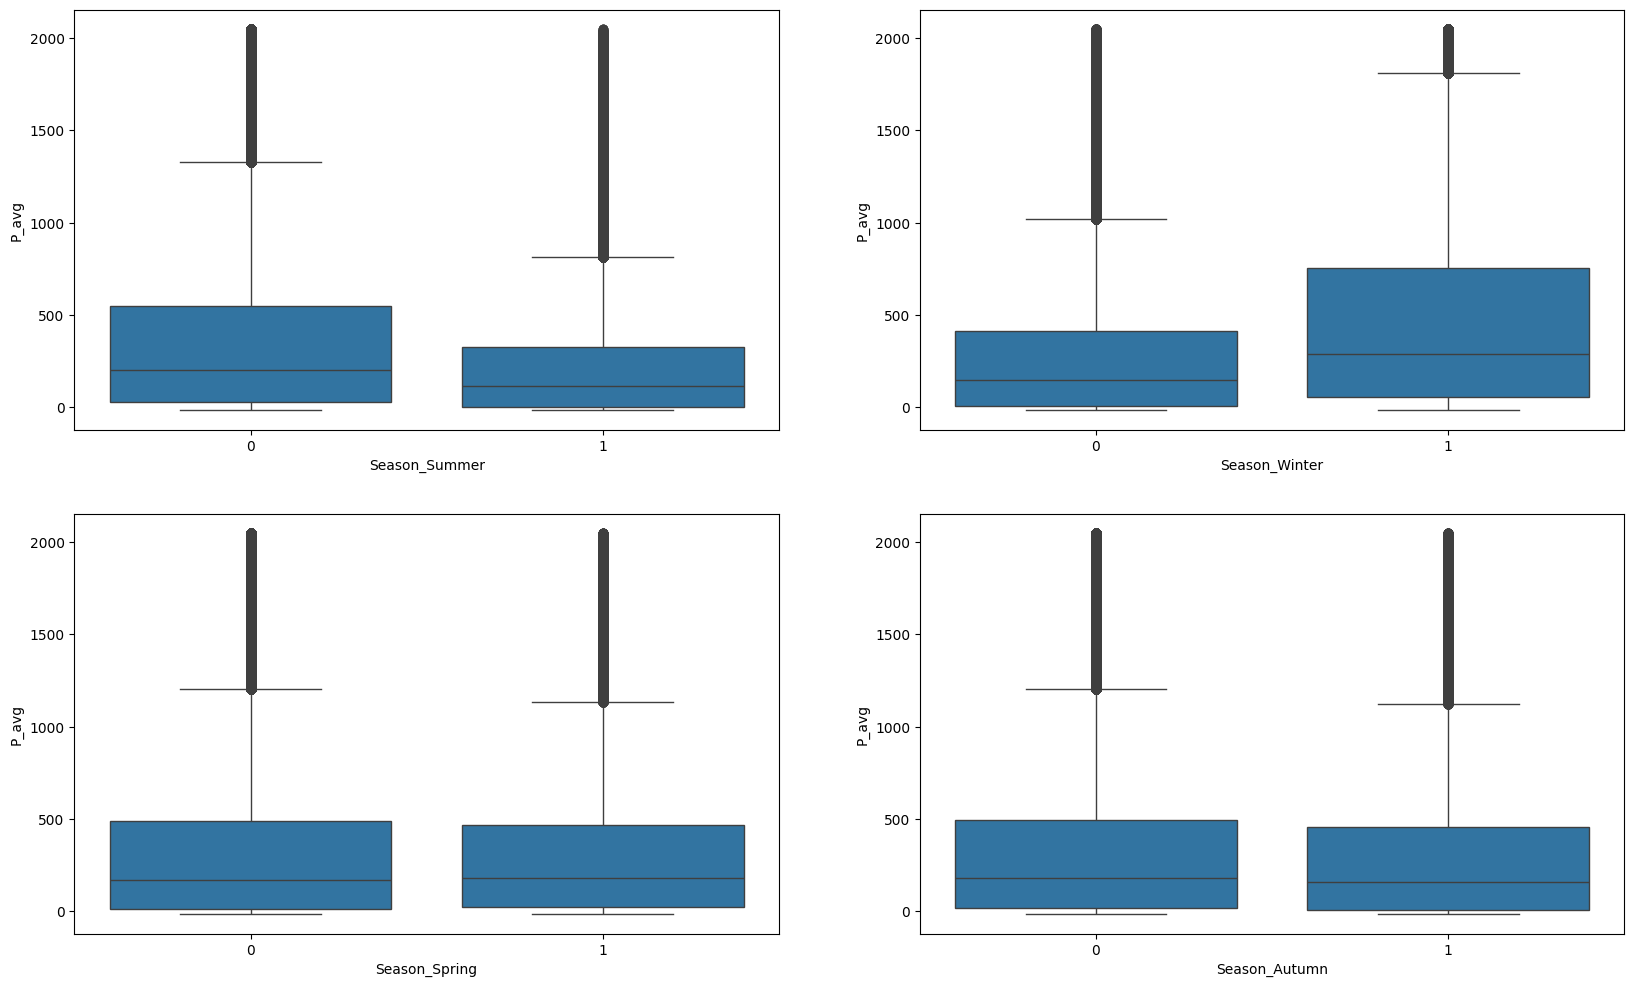

In [32]:
#Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Season_Summer', y = 'P_avg', data = wt)
plt.subplot(2,2,2)
sns.boxplot(x = 'Season_Winter', y = 'P_avg', data = wt)
plt.subplot(2,2,3)
sns.boxplot(x = 'Season_Spring', y = 'P_avg', data = wt)
plt.subplot(2,2,4)
sns.boxplot(x = 'Season_Autumn', y = 'P_avg', data = wt)


plt.show()

It seems Winter season gives more power in average than most of the Seasons

<Axes: xlabel='Season_Autumn', ylabel='wind_speed'>

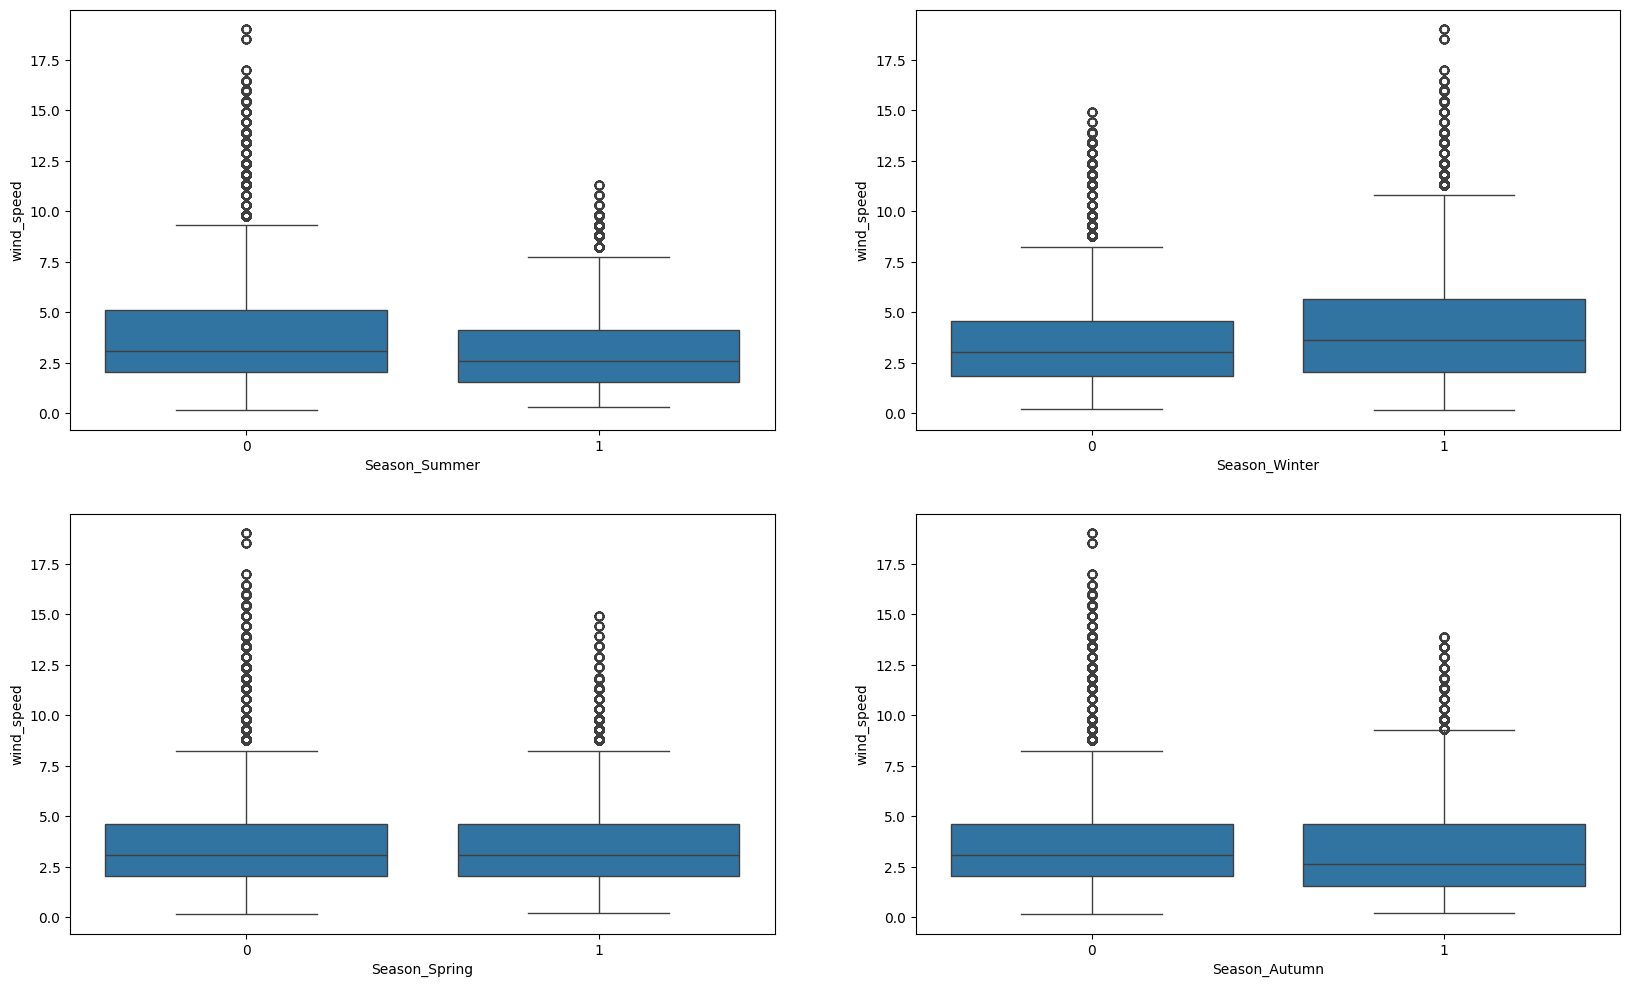

In [33]:
#Checking for Outliers on some important parameters like wind speed
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Season_Summer', y = 'wind_speed', data = wt)
plt.subplot(2,2,2)
sns.boxplot(x = 'Season_Winter', y = 'wind_speed', data = wt)
plt.subplot(2,2,3)
sns.boxplot(x = 'Season_Spring', y = 'wind_speed', data = wt)
plt.subplot(2,2,4)
sns.boxplot(x = 'Season_Autumn', y = 'wind_speed', data = wt)


<Axes: xlabel='Season_Autumn', ylabel='temp'>

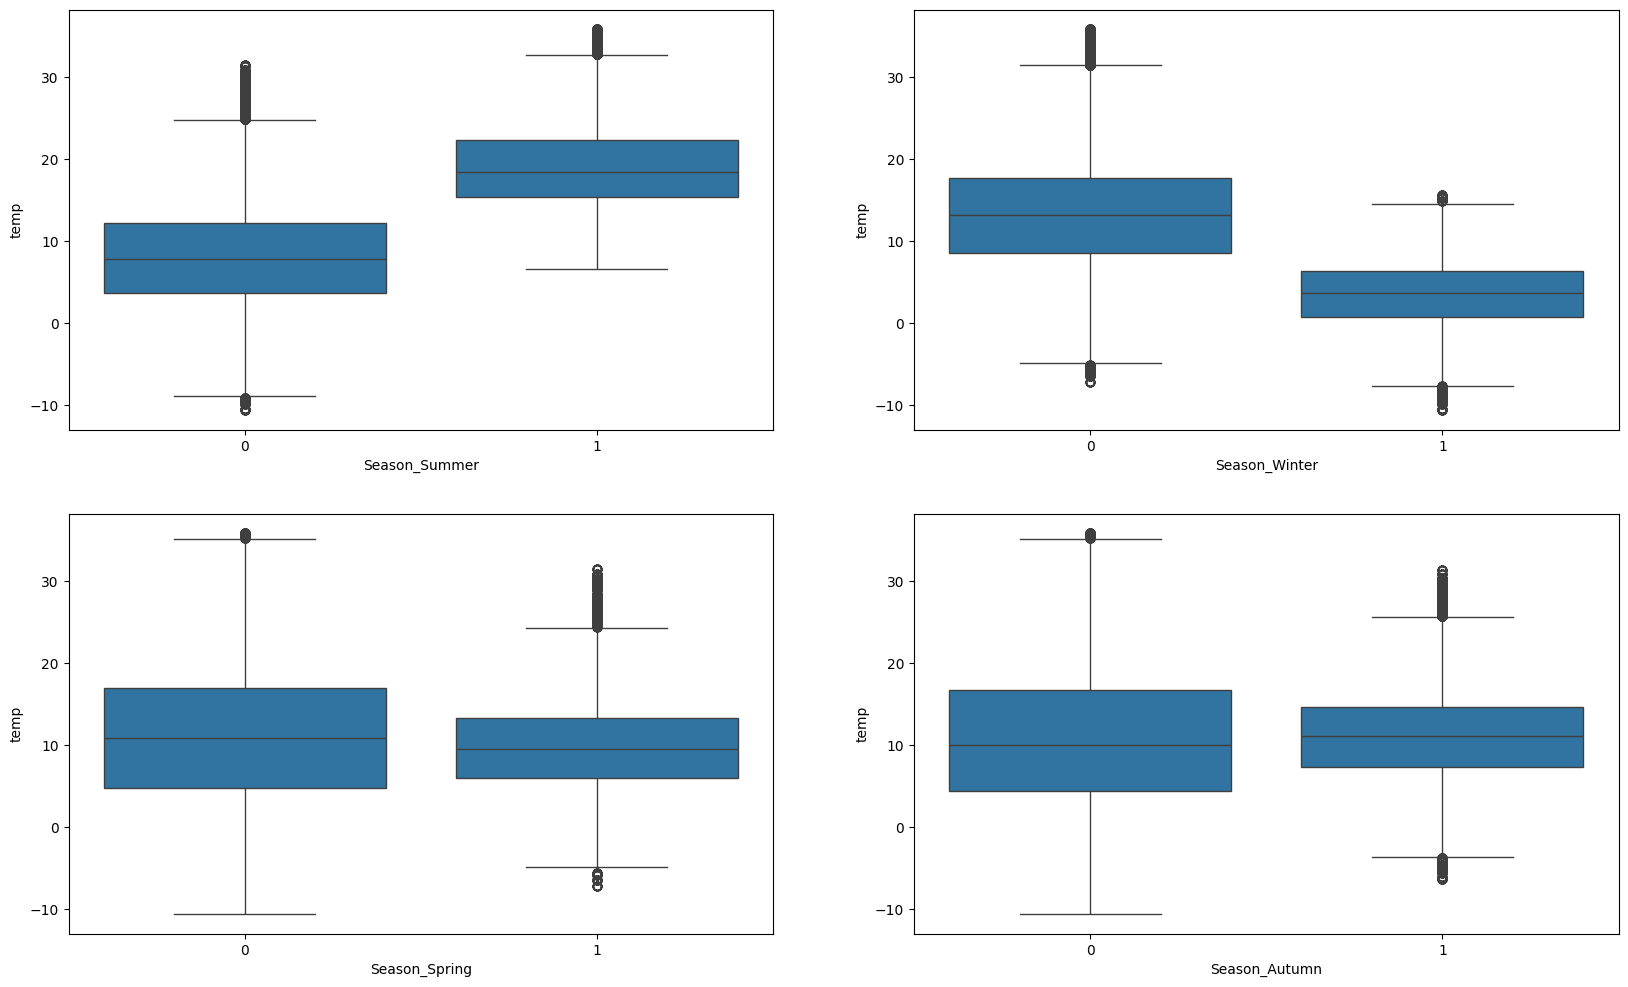

In [34]:
#Checking for Outliers on some important parameters like Outside Temperature
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Season_Summer', y = 'temp', data = wt)
plt.subplot(2,2,2)
sns.boxplot(x = 'Season_Winter', y = 'temp', data = wt)
plt.subplot(2,2,3)
sns.boxplot(x = 'Season_Spring', y = 'temp', data = wt)
plt.subplot(2,2,4)
sns.boxplot(x = 'Season_Autumn', y = 'temp', data = wt)

<Axes: xlabel='Season_Autumn', ylabel='humidity'>

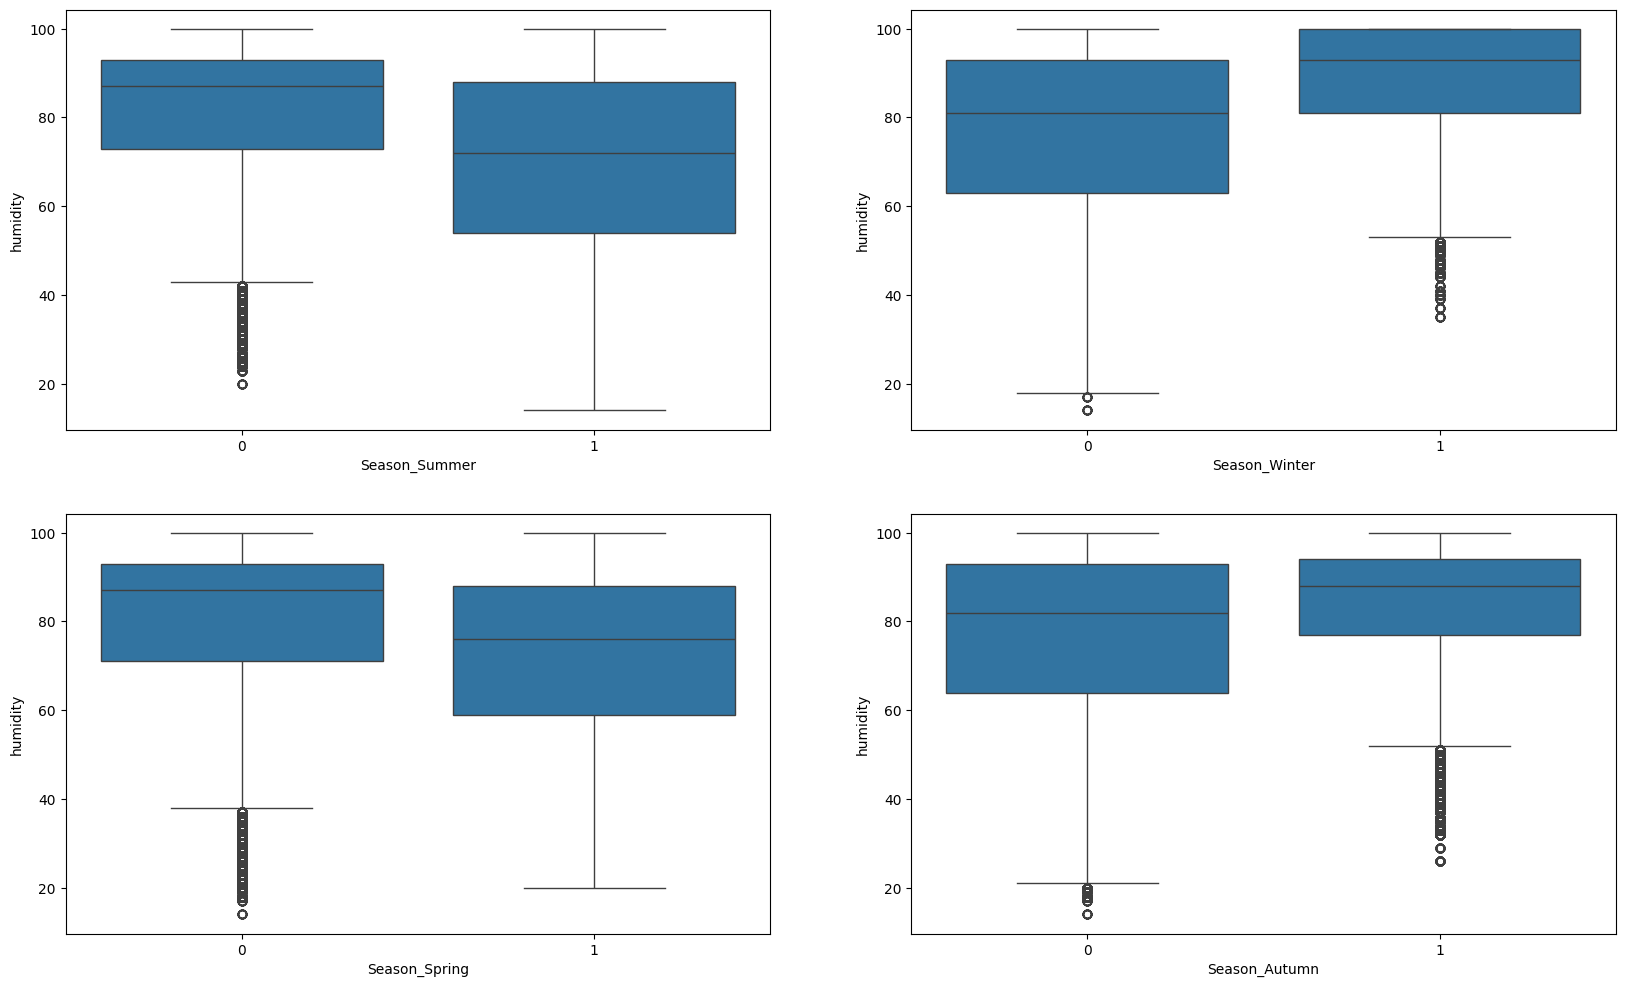

In [35]:
#Checking for Outliers on some important parameters like Outside Temperature
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Season_Summer', y = 'humidity', data = wt)
plt.subplot(2,2,2)
sns.boxplot(x = 'Season_Winter', y = 'humidity', data = wt)
plt.subplot(2,2,3)
sns.boxplot(x = 'Season_Spring', y = 'humidity', data = wt)
plt.subplot(2,2,4)
sns.boxplot(x = 'Season_Autumn', y = 'humidity', data = wt)

<Axes: xlabel='Season_Autumn', ylabel='rain_1h'>

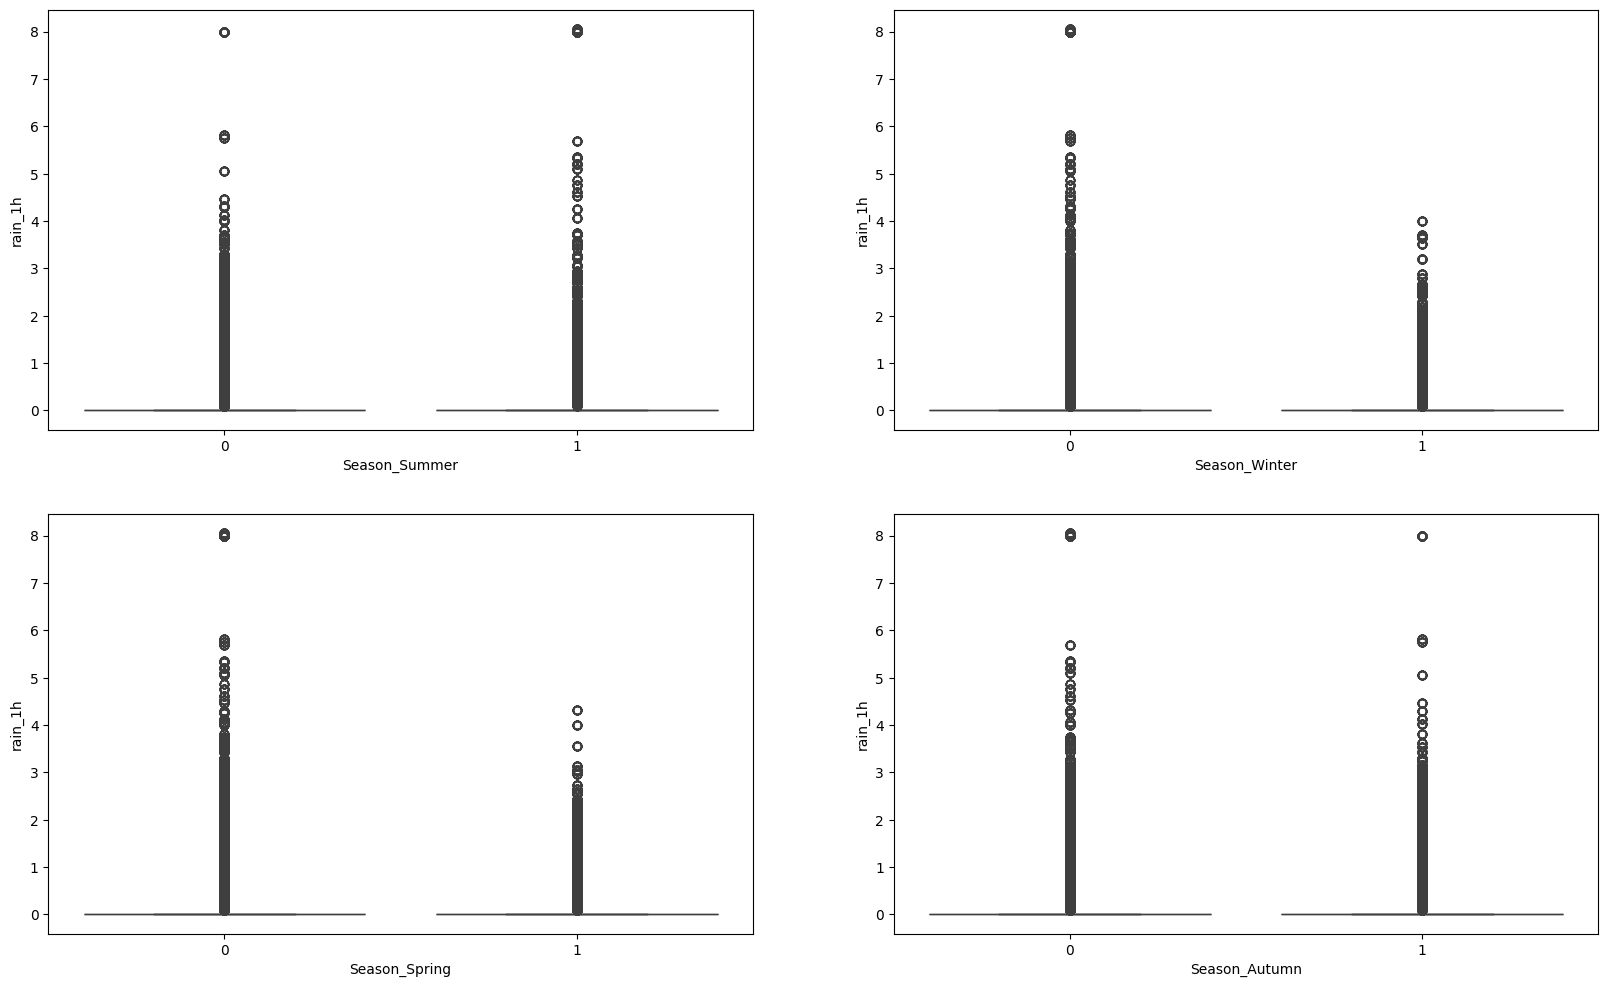

In [36]:
#Checking for Outliers on some important parameters like Outside Temperature
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Season_Summer', y = 'rain_1h', data = wt)
plt.subplot(2,2,2)
sns.boxplot(x = 'Season_Winter', y = 'rain_1h', data = wt)
plt.subplot(2,2,3)
sns.boxplot(x = 'Season_Spring', y = 'rain_1h', data = wt)
plt.subplot(2,2,4)
sns.boxplot(x = 'Season_Autumn', y = 'rain_1h', data = wt)

<Axes: xlabel='Season_Autumn', ylabel='snow_1h'>

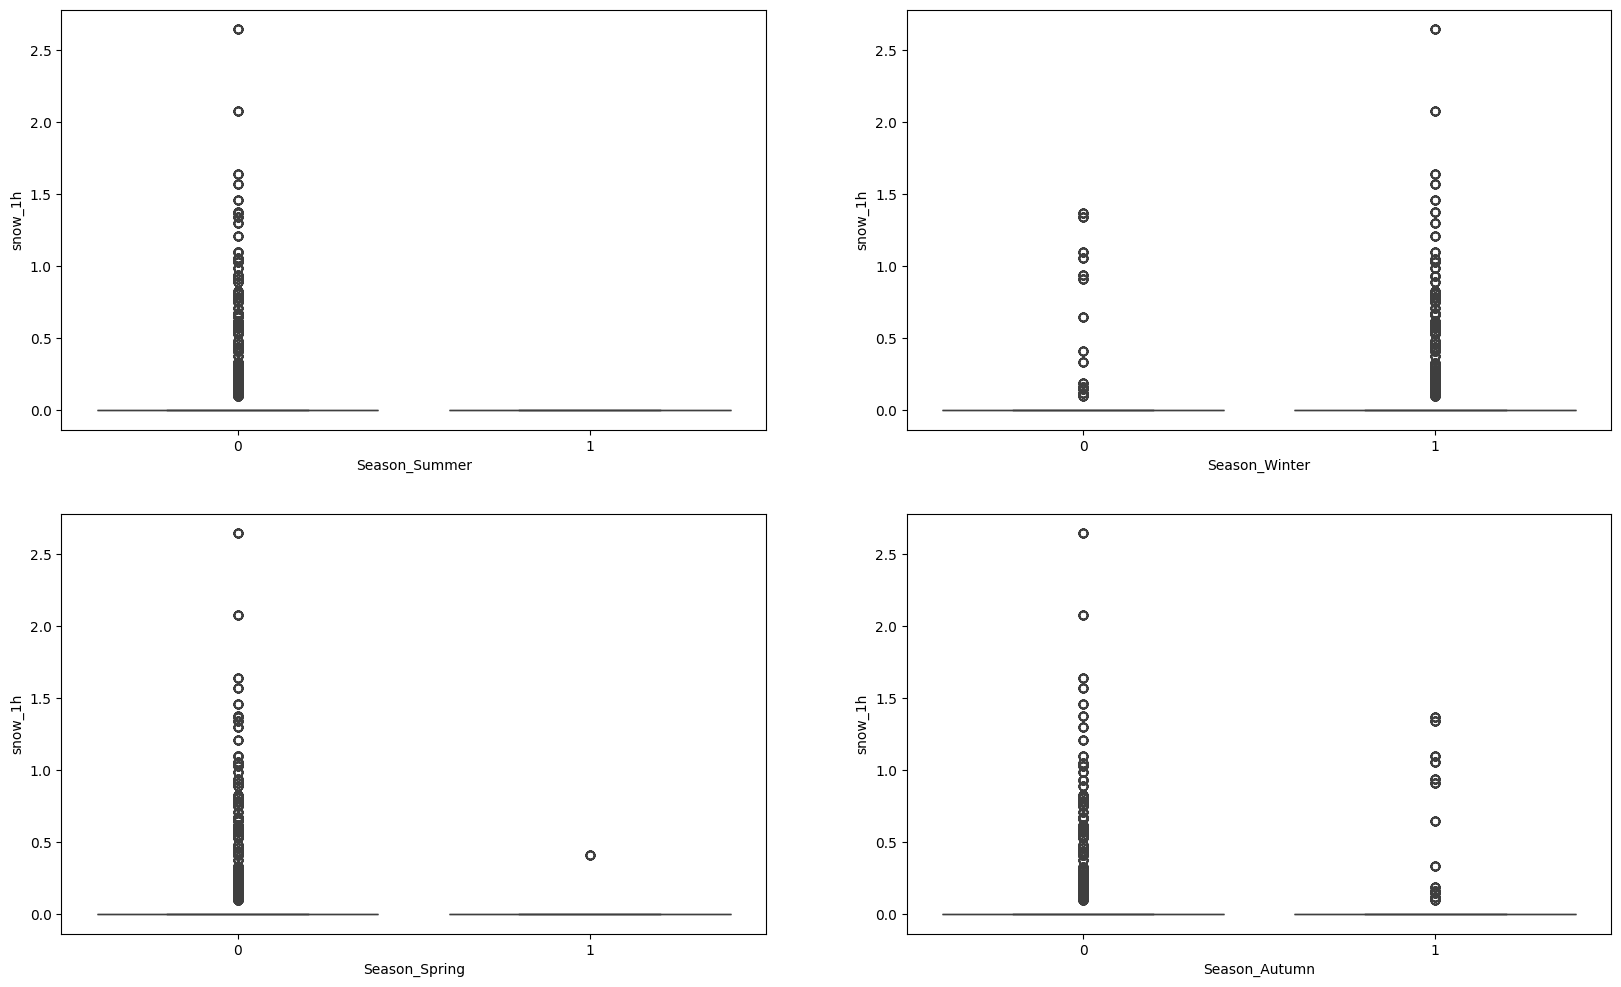

In [37]:
#Checking for Outliers on some important parameters like Outside Temperature
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Season_Summer', y = 'snow_1h', data = wt)
plt.subplot(2,2,2)
sns.boxplot(x = 'Season_Winter', y = 'snow_1h', data = wt)
plt.subplot(2,2,3)
sns.boxplot(x = 'Season_Spring', y = 'snow_1h', data = wt)
plt.subplot(2,2,4)
sns.boxplot(x = 'Season_Autumn', y = 'snow_1h', data = wt)

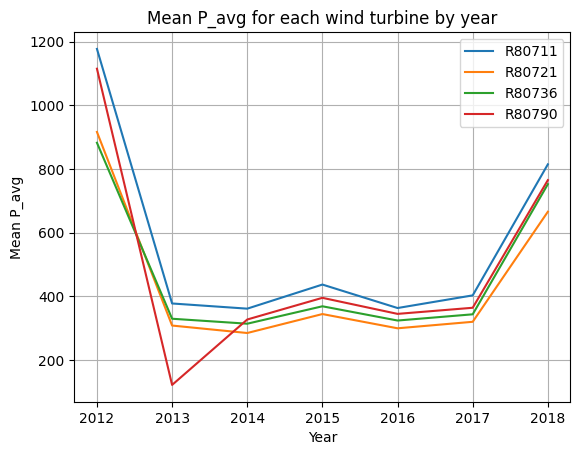

In [38]:
# Group data by 'Wind_turbine_name' and 'Year', calculate the mean of 'P_avg' for each group
grouped_data = wt.groupby(['Wind_turbine_name', 'Year'])['P_avg'].mean().reset_index()

# Plotting
for turbine_name, group in grouped_data.groupby('Wind_turbine_name'):
    plt.plot(group['Year'], group['P_avg'], label=turbine_name)

plt.xlabel('Year')
plt.ylabel('Mean P_avg')
plt.title('Mean P_avg for each wind turbine by year')
plt.legend()
plt.grid(True)
plt.show()

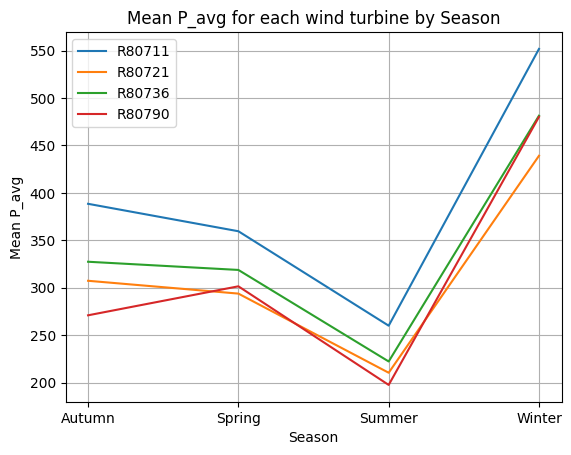

In [39]:
# Group data by 'Wind_turbine_name' and 'Season', calculate the mean of 'P_avg' for each group
grouped_data = wt.groupby(['Wind_turbine_name', 'Season'])['P_avg'].mean().reset_index()

# Plotting
for turbine_name, group in grouped_data.groupby('Wind_turbine_name'):
    plt.plot(group['Season'], group['P_avg'], label=turbine_name)

plt.xlabel('Season')
plt.ylabel('Mean P_avg')
plt.title('Mean P_avg for each wind turbine by Season')
plt.legend()
plt.grid(True)
plt.show()

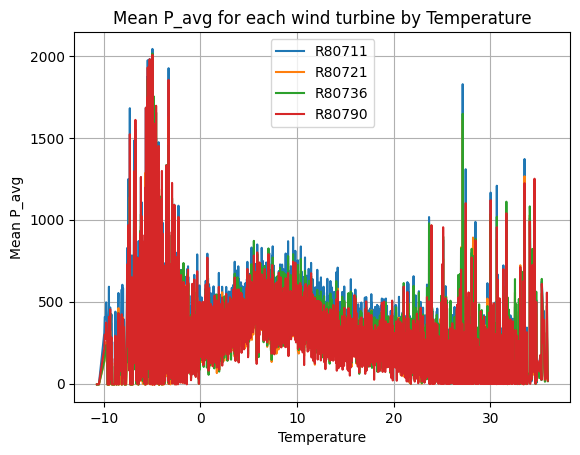

In [40]:
# Group data by 'Wind_turbine_name' and 'Temperature', calculate the mean of 'P_avg' for each group
grouped_data = wt.groupby(['Wind_turbine_name', 'temp'])['P_avg'].mean().reset_index()

# Plotting
for turbine_name, group in grouped_data.groupby('Wind_turbine_name'):
    plt.plot(group['temp'], group['P_avg'], label=turbine_name)

plt.xlabel('Temperature')
plt.ylabel('Mean P_avg')
plt.title('Mean P_avg for each wind turbine by Temperature')
plt.legend()
plt.grid(True)
plt.show()

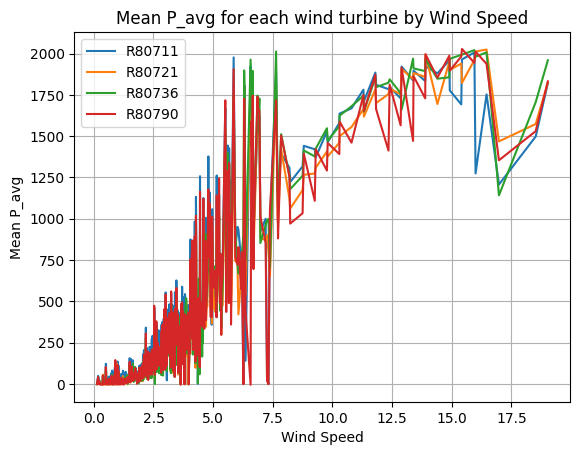

In [41]:
# Group data by 'Wind_turbine_name' and 'Wind_Speed', calculate the mean of 'P_avg' for each group
grouped_data = wt.groupby(['Wind_turbine_name', 'wind_speed'])['P_avg'].mean().reset_index()

# Plotting
for turbine_name, group in grouped_data.groupby('Wind_turbine_name'):
    plt.plot(group['wind_speed'], group['P_avg'], label=turbine_name)

plt.xlabel('Wind Speed')
plt.ylabel('Mean P_avg')
plt.title('Mean P_avg for each wind turbine by Wind Speed')
plt.legend()
plt.grid(True)
plt.show()

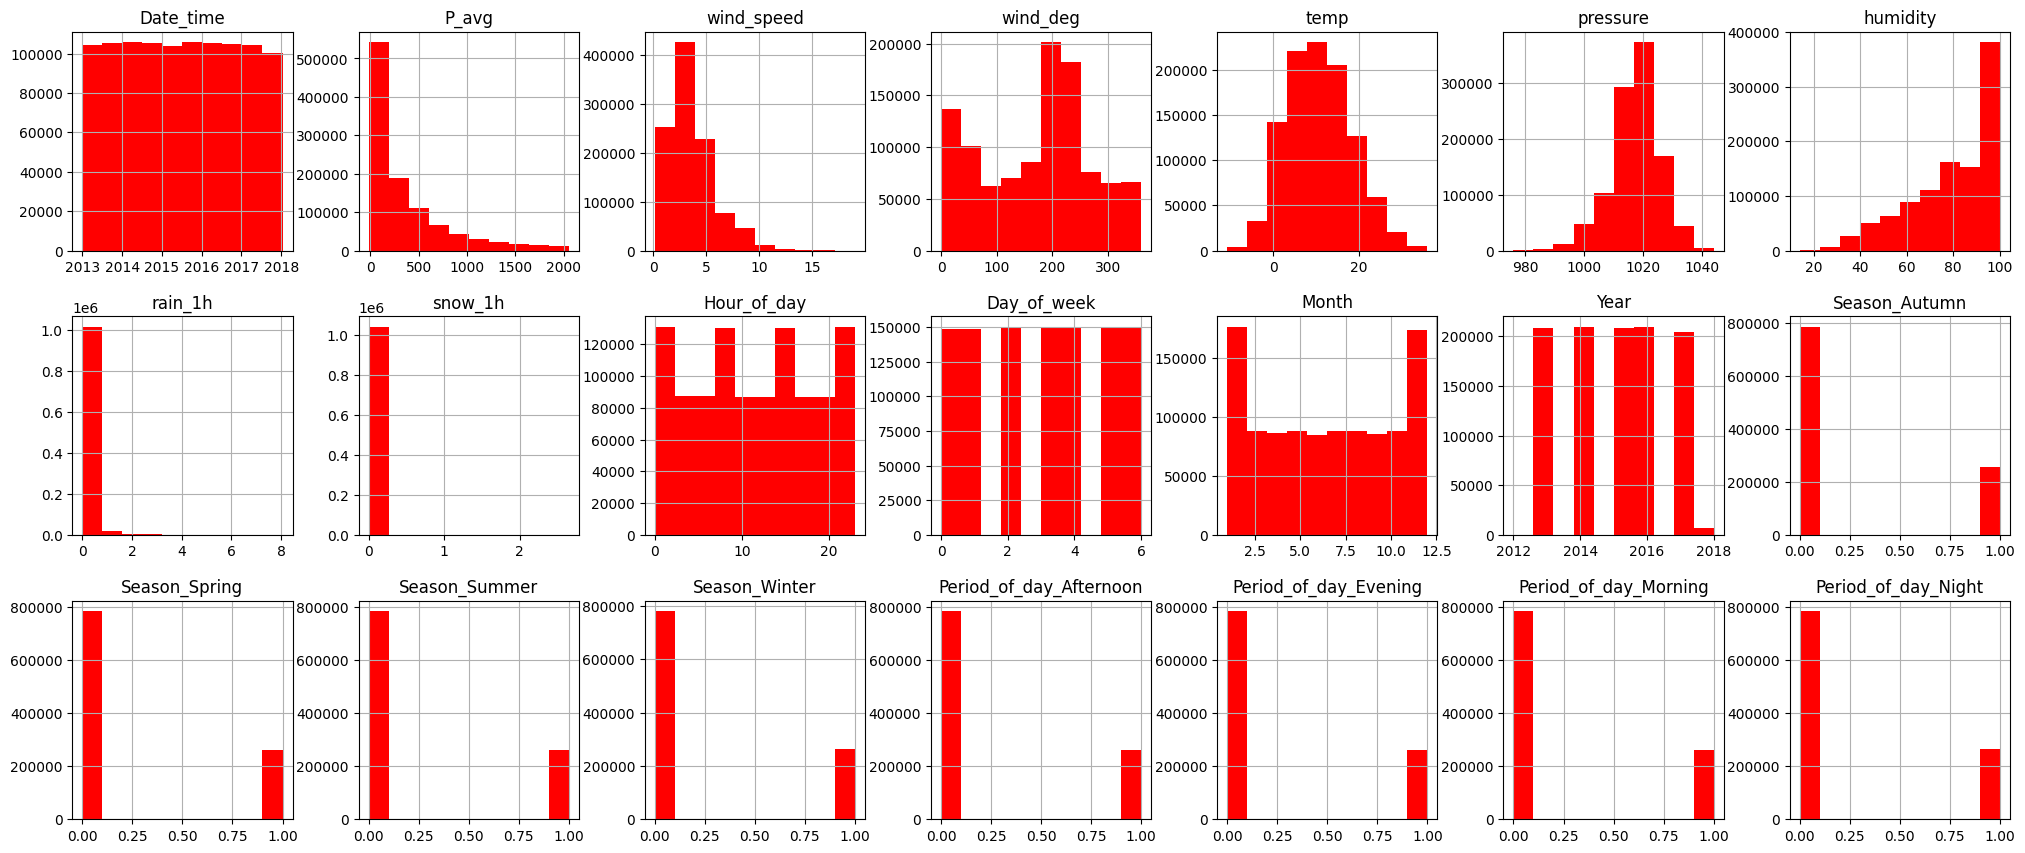

Data Distribution


In [42]:
#Data Distribution
wt.hist(layout = (7,7), figsize=(25,25), color = 'red')
#plt.xlabel('X Label', fontsize=12)  # Adjust the fontsize as needed
#plt.ylabel('Y Label', fontsize=12)  # Adjust the fontsize as needed
plt.title('Data Distribution', fontsize=16)  # Adjust the title fontsize as needed
plt.tick_params(axis='both', labelsize=10)  # Adjust the tick label fontsize as needed
plt.show()
print('Data Distribution')

In [43]:
##sns.pairplot(wt)
#plt.show()

In [44]:
# Since the visualization is done let's drop the object typed variables such as Season, Windmill_name etc
# Drop the original 'Season' and 'Period_of_day' columns
wt.drop(['Season', 'Period_of_day','Wind_turbine_name', 'Date_time'], axis=1, inplace=True)

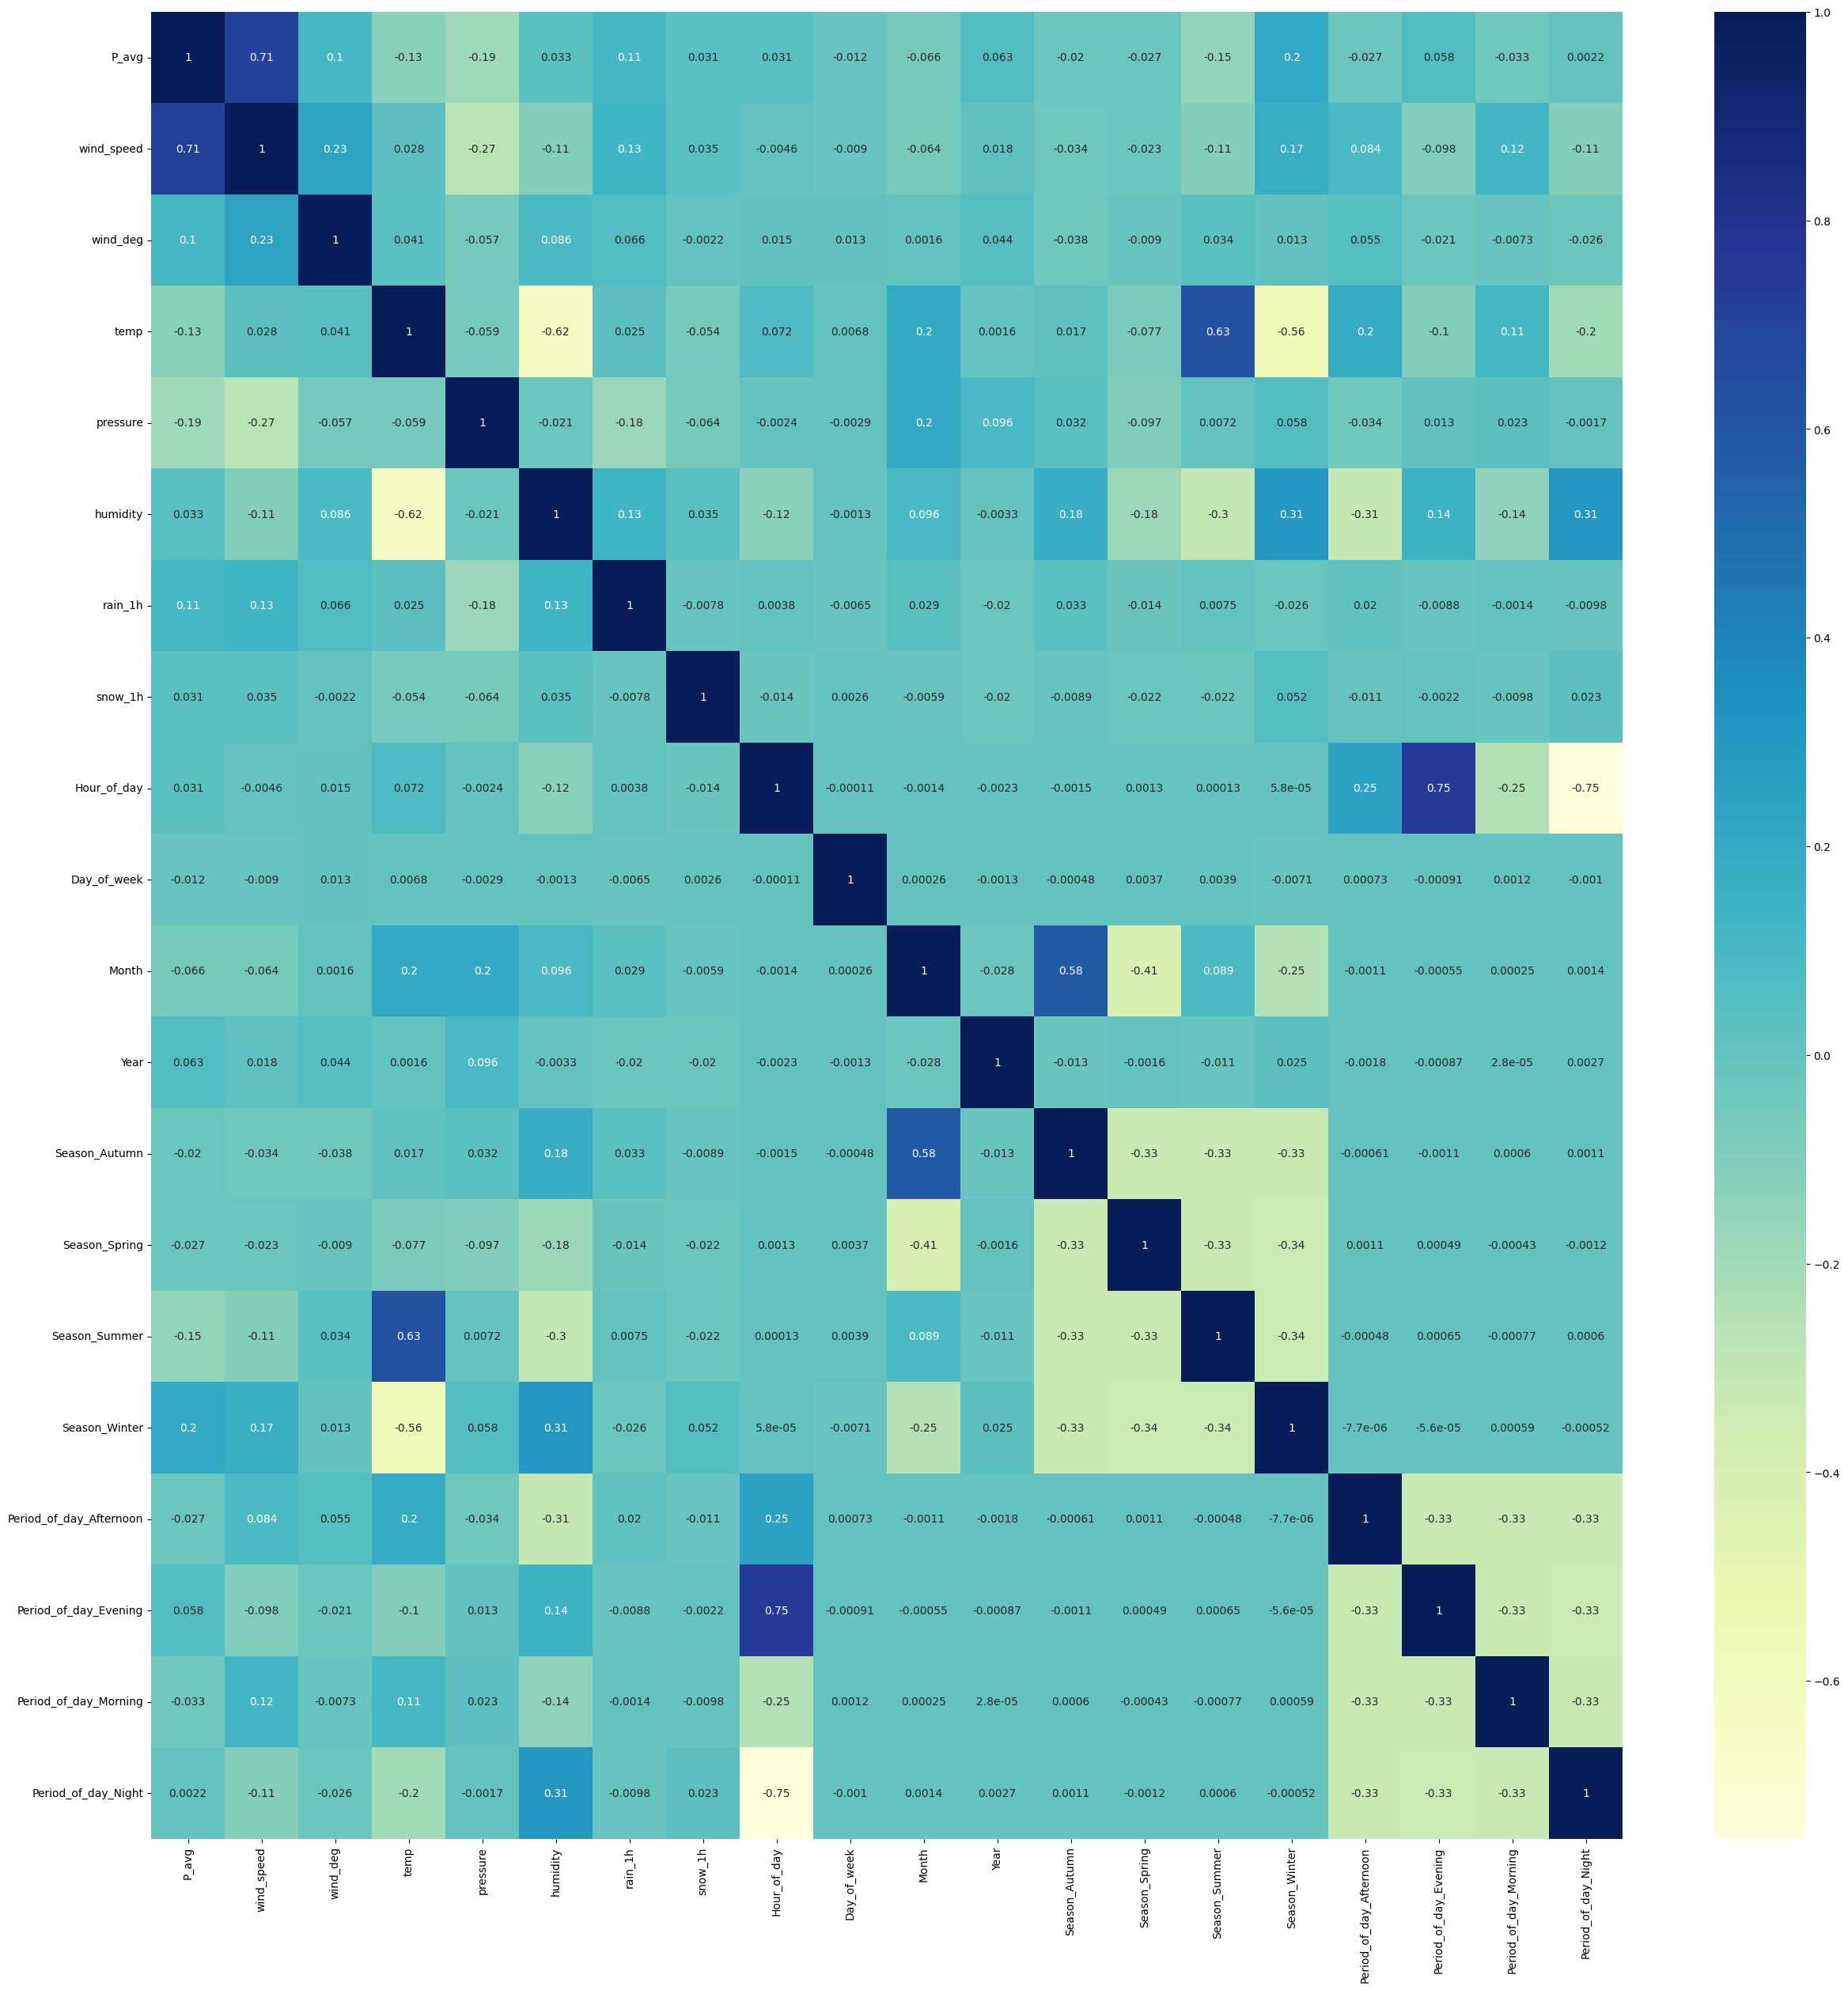

In [45]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(wt.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [46]:
wt.dtypes

P_avg                      float64
wind_speed                 float64
wind_deg                   float64
temp                       float64
pressure                   float64
humidity                   float64
rain_1h                    float64
snow_1h                    float64
Hour_of_day                  int32
Day_of_week                  int32
Month                        int32
Year                         int32
Season_Autumn                int64
Season_Spring                int64
Season_Summer                int64
Season_Winter                int64
Period_of_day_Afternoon      int64
Period_of_day_Evening        int64
Period_of_day_Morning        int64
Period_of_day_Night          int64
dtype: object

In [47]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(wt, train_size = 0.8, test_size = 0.2, random_state = 100)

# Scaling the data
Scaling techniques are essential preprocessing steps in machine learning to normalize or standardize the features of a dataset. They ensure that features are on a similar scale, preventing certain features from dominating others due to their larger magnitude. One commonly used scaling technique is the Min-Max Scaler.
- **Min-Max Scaler**: This scaler rescales features to a specified range, typically between 0 and 1. It works by subtracting the minimum value of the feature and then dividing by the range of values (i.e., maximum value minus minimum value). It is suitable for algorithms sensitive to the magnitude of features, such as neural networks and algorithms using distance-based metrics.

- **Standard Scaler (Z-score normalization)**: This scaler scales features to have a mean of 0 and a standard deviation of 1. It works by subtracting the mean of the feature and then dividing by the standard deviation. It is suitable for algorithms that assume normally distributed features, such as linear regression, logistic regression, and SVMs.

- ** Robust Scaler**: This scaler is robust to outliers in the data. It scales features using the interquartile range (IQR), making it suitable for datasets with outliers.

- **Max Abs Scaler**: This scaler scales features to the maximum absolute value, making the maximum absolute value of each feature 1. It is useful when the magnitude of features is unknown or varies widely.

- **Quantile Transformer Scaler**: This scaler transforms features to follow a Gaussian distribution using quantile information. It is robust to outliers and ensures that the transformed data has a more Gaussian-like distribution.

Here I have used Min-Max scalar

In [48]:
scaler = MinMaxScaler()

In [49]:
df_train.columns

Index(['P_avg', 'wind_speed', 'wind_deg', 'temp', 'pressure', 'humidity',
       'rain_1h', 'snow_1h', 'Hour_of_day', 'Day_of_week', 'Month', 'Year',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Period_of_day_Afternoon', 'Period_of_day_Evening',
       'Period_of_day_Morning', 'Period_of_day_Night'],
      dtype='object')

In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['P_avg', 'wind_speed', 'wind_deg', 'temp', 'pressure', 'humidity',
       'rain_1h', 'snow_1h', 'Hour_of_day', 'Day_of_week', 'Month', 'Year']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

##**Feature Selection for Regression Model for Predicting Active Power (P)**
Feature selection for linear regression involves choosing a subset of relevant features from the dataset to improve model performance and interpretability. Here are some common techniques for feature selection in linear regression:
- **Correlation Analysis**: Calculate the correlation coefficients between each feature and the target variable. Features with high correlation values (either positive or negative) are likely to be more relevant.

- **Recursive Feature Elimination (RFE):** RFE is an iterative technique that recursively removes the least important feature from the dataset until the specified number of features is reached. It uses the model's coefficients or feature importances to determine feature importance.

- **Forward or Backward Selection:** These methods start with an empty set of features (forward selection) or the full set of features (backward selection) and iteratively add or remove features based on their impact on model performance.

- **Lasso Regression (L1 Regularization)**: Lasso regression adds a penalty term to the linear regression objective function, which penalizes the absolute magnitude of the coefficients. This leads to some coefficients being exactly zero, effectively performing feature selection.

- **Feature Importance from Tree-based Models**: If your dataset contains a large number of features, you can train a tree-based model (e.g., Random Forest) and use feature importances to identify the most important features.

- **Principal Component Analysis (PCA)**: PCA is a dimensionality reduction technique that can be used to transform the original features into a smaller set of orthogonal components. These components can then be used as input features for linear regression.

-  **Variance Inflation Factor (VIF)**: Pairwise correlation helps understand relationships between independent variables, but for complex dependencies, Variance Inflation Factor (VIF) is crucial. VIF measures how well a variable is explained by others, identifying multicollinearity. With VIF > 10, eliminating variables is imperative; VIF > 5 requires inspection, while VIF < 5 indicates a valuable variable. In feature selection, combinations of high p-values and VIF, low p-values and VIF, or mixed values guide decisions. Prioritize dropping variables with high p-values and low VIF, followed by those with low p-values and high VIF. This systematic approach optimizes model efficiency and accuracy by handling multicollinearity effectively.

*Due to time constraint I used only RFE*


In [51]:
y_train = df_train.pop('P_avg')
X_train = df_train

y_test = df_test.pop("P_avg")
X_test = df_test

In [52]:
model = LinearRegression()
# Initialize RFE with the linear regression model
# Specify the number of desired features to select (n_features_to_select)
rfe = RFE(model, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [53]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wind_speed', True, 1),
 ('wind_deg', True, 1),
 ('temp', True, 1),
 ('pressure', False, 2),
 ('humidity', False, 3),
 ('rain_1h', True, 1),
 ('snow_1h', True, 1),
 ('Hour_of_day', True, 1),
 ('Day_of_week', False, 5),
 ('Month', False, 4),
 ('Year', True, 1),
 ('Season_Autumn', True, 1),
 ('Season_Spring', True, 1),
 ('Season_Summer', True, 1),
 ('Season_Winter', True, 1),
 ('Period_of_day_Afternoon', True, 1),
 ('Period_of_day_Evening', True, 1),
 ('Period_of_day_Morning', True, 1),
 ('Period_of_day_Night', True, 1)]

In [55]:
#Getting the column names from x_train to implement on X_test
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['pressure', 'humidity', 'Day_of_week', 'Month'], dtype='object')

In [56]:
X_train = X_train[col]
X_test = X_test[col]

In [57]:
X_test

,wind_speed,wind_deg,temp,rain_1h,snow_1h,Hour_of_day,Year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Period_of_day_Afternoon,Period_of_day_Evening,Period_of_day_Morning,Period_of_day_Night
243778,0.047619,0.527778,0.424528,0.0,0.0,0.913043,0.833333,1,0,0,0,0,1,0,0
220149,0.347090,0.138889,0.551458,0.0,0.0,0.652174,0.833333,0,1,0,0,1,0,0,0
140435,0.262963,0.194444,0.623928,0.0,0.0,0.347826,0.500000,1,0,0,0,0,0,1,0
15348,0.211111,0.722222,0.524443,0.0,0.0,0.695652,0.166667,0,1,0,0,1,0,0,0
62963,0.183598,0.611111,0.407161,0.0,0.0,0.304348,0.333333,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9862,0.129101,0.194444,0.330403,0.0,0.0,0.434783,0.166667,0,1,0,0,0,0,1,0
41551,0.292593,0.500000,0.626072,0.0,0.0,0.391304,0.166667,1,0,0,0,0,0,1,0
160494,0.374074,0.583333,0.415738,0.0,0.0,0.391304,0.666667,0,0,0,1,0,0,1,0
42797,0.537566,0.527778,0.516295,0.0,0.0,0.086957,0.166667,1,0,0,0,0,0,0,1


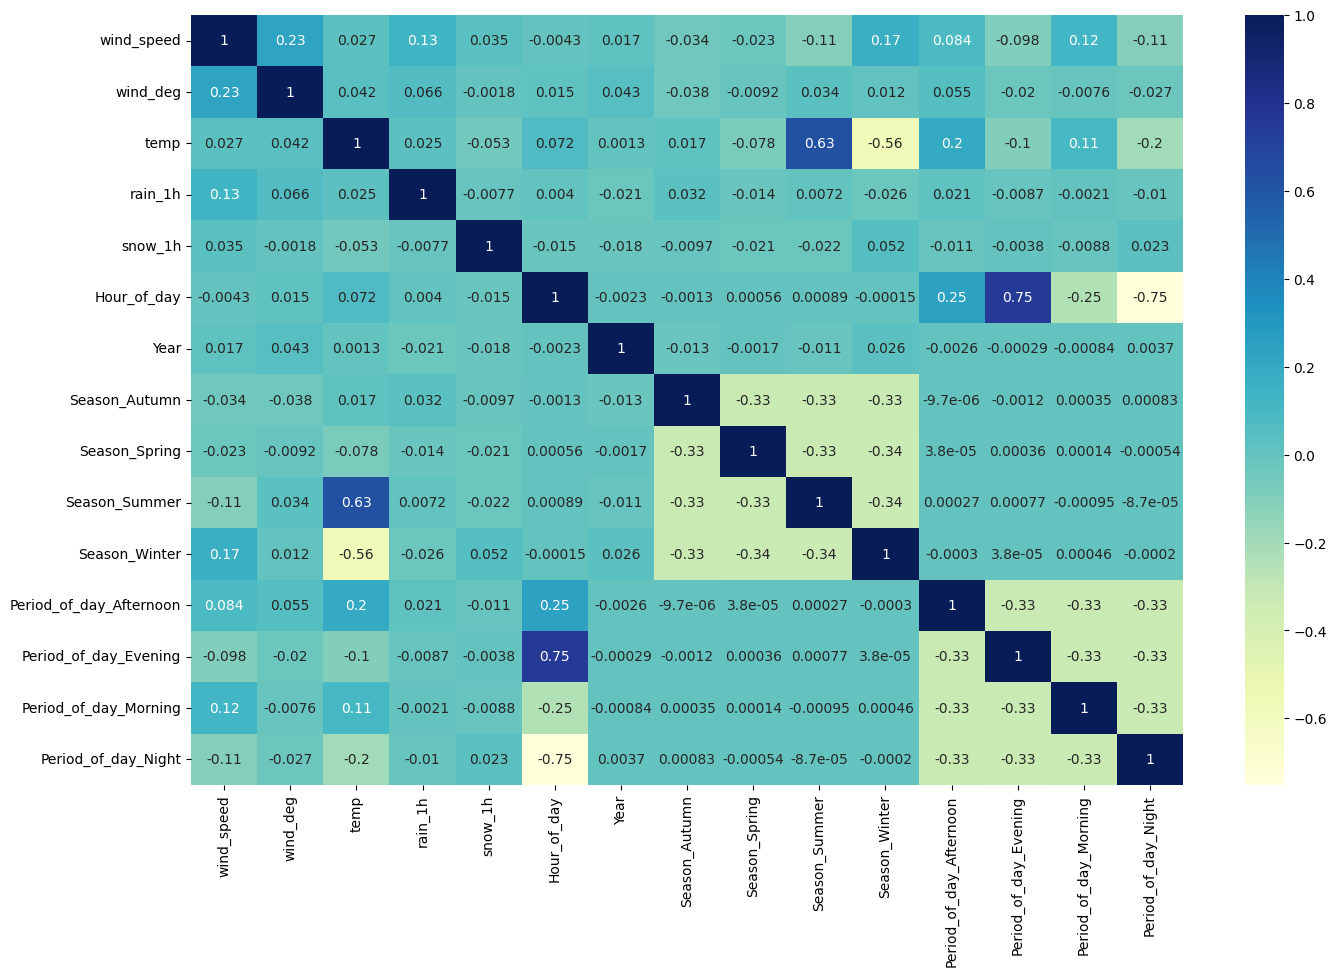

In [58]:
# Let's check the correlation coefficients to see if the correlations have been taken care of

plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Looks like Hour of the day is not adding much value as we are already considering the period of the day

In [59]:
X_train = X_train.drop(columns = ["Hour_of_day"])
X_test = X_test.drop(columns = ["Hour_of_day"])

In [60]:
X_train

,wind_speed,wind_deg,temp,rain_1h,snow_1h,Year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Period_of_day_Afternoon,Period_of_day_Evening,Period_of_day_Morning,Period_of_day_Night
56701,0.210053,0.527778,0.311750,0.000000,0.000000,0.333333,0,0,0,1,1,0,0,0
46262,0.102116,0.444444,0.229846,0.000000,0.128302,0.166667,1,0,0,0,0,0,0,1
242894,0.292593,0.583333,0.738422,0.000000,0.000000,0.833333,0,0,1,0,1,0,0,0
211149,0.156614,0.166667,0.125643,0.000000,0.000000,0.833333,0,0,0,1,0,0,0,1
214434,0.156614,0.555556,0.320111,0.000000,0.000000,0.833333,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79666,0.211111,0.666667,0.572256,0.062035,0.000000,0.333333,0,0,1,0,0,1,0,0
254804,0.238095,0.583333,0.275300,0.000000,0.000000,0.833333,1,0,0,0,0,1,0,0
210755,0.211111,0.750000,0.352273,0.000000,0.000000,0.833333,0,0,0,1,0,0,0,1
56088,0.401587,0.500000,0.309177,0.000000,0.000000,0.333333,0,0,0,1,0,0,1,0


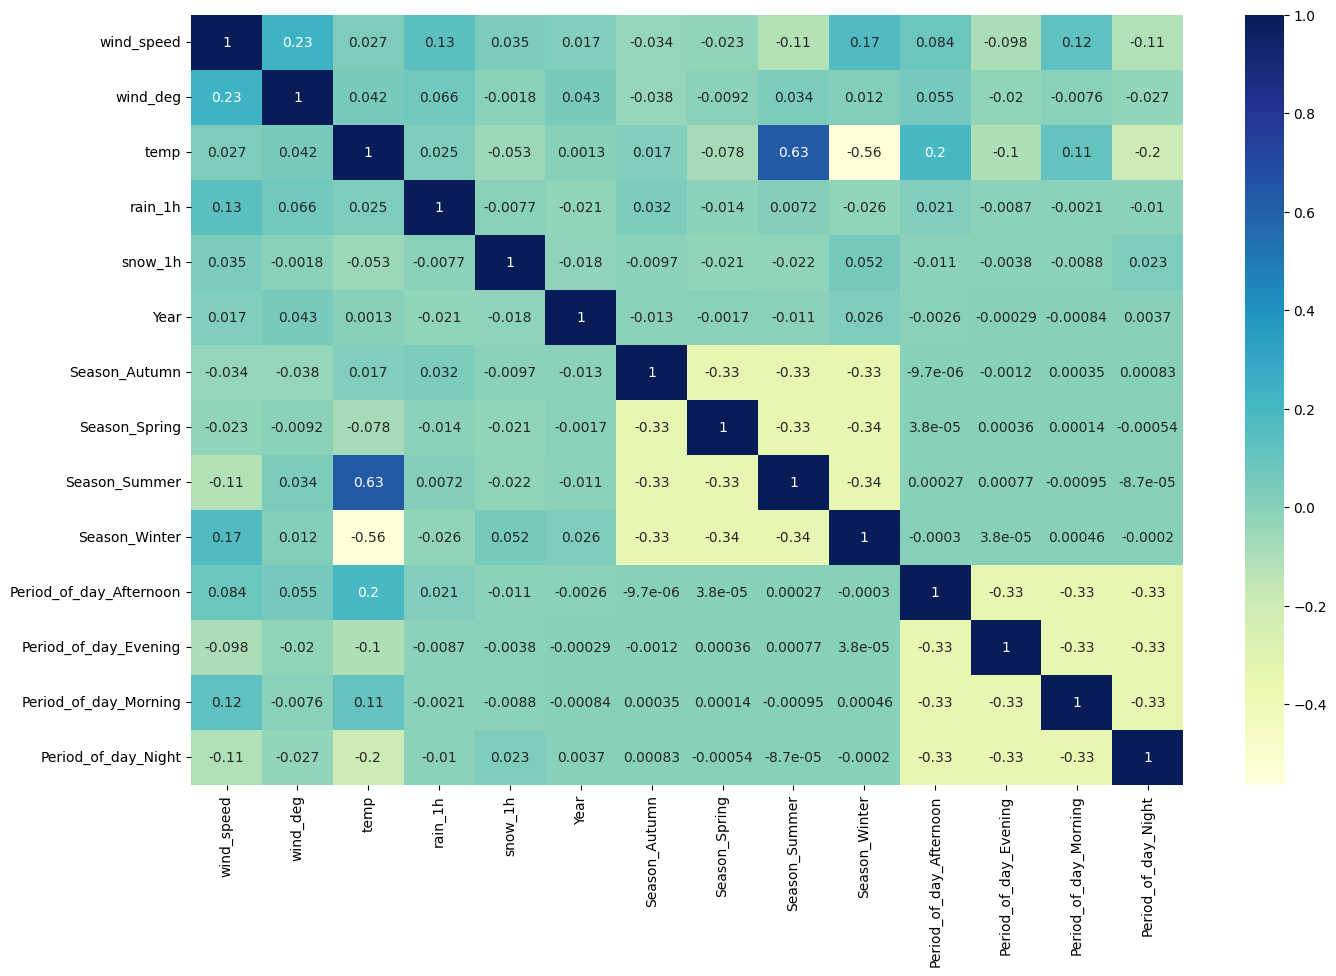

In [61]:
# Let's check if the correlation is looking better

plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [62]:
#creating a dataframe to store every value from every model
metric = pd.DataFrame()

## Simple Linear Regression

In [63]:
model = LinearRegression()
# Fit a line
model.fit(X_train, y_train)


LinearRegression()

In [64]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

##Evaluation Metrics

In evaluating regression models, a variety of metrics are used to assess their performance and accuracy in predicting continuous outcomes. Here are some commonly used metrics:

- **R-squared (R2)**: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. R2 ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any of the variability in the dependent variable.

- **Adjusted R-squared**: Similar to R2, adjusted R2 also measures the proportion of variance explained by the model. However, it penalizes the addition of unnecessary predictors in the model, making it more suitable for models with multiple predictors.

- **Mean Squared Error (MSE)**: MSE measures the average squared difference between the actual and predicted values. It gives more weight to larger errors and is commonly used to assess the overall accuracy of the model.

- **Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the predicted values. It is in the same unit as the dependent variable, making it easier to interpret.

- **Mean Absolute Error (MAE)**: MAE measures the average absolute difference between the actual and predicted values. It is less sensitive to outliers compared to MSE and RMSE, making it a useful metric when dealing with datasets with extreme values.

- **Mean Absolute Percentage Error (MAPE)**: MAPE expresses the prediction errors as a percentage of the actual values. It provides a relative measure of accuracy and is often used in forecasting models.

In [65]:
#Metric evaluations
#R-Squared
r2_train = r2_score(y_train, y_train_pred)
r2_test =  r2_score(y_test, y_test_pred)

#Adjusted R2
ad_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1) / (len(y_train) - 20 - 1)) # Since we have 20 features
ad_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1) / (len(y_test) - 20 - 1)) # Since we have 20 features


# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


# Calculate MAPE
#mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
#mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

df = pd.DataFrame({"Method": "Simple Linear Regression","R2(Train)": r2_train,"R2(Test)": r2_test,"Adjusted_R2(Train)": ad_r2_train,"Adjusted_R2(Test)": ad_r2_test,"Mean Absolute Error(Train)": mae_train,"Mean Absolute Error(Test)": mae_test,"Mean Squared Error(Train)": mse_train,"Mean Squared Error(Test)": mse_test,"Root Mean Squared Error(Train)": rmse_train,"Root Mean Squared Error(Test)": rmse_test}, index = [1])
metric = metric._append(df)
#"MAPE(Train)": mape_train,"MAPE(Test)": mape_test

In [66]:
metric

,Method,R2(Train),R2(Test),Adjusted_R2(Train),Adjusted_R2(Test),Mean Absolute Error(Train),Mean Absolute Error(Test),Mean Squared Error(Train),Mean Squared Error(Test),Root Mean Squared Error(Train),Root Mean Squared Error(Test)
1,Simple Linear Regression,0.552021,0.554166,0.55201,0.554123,0.100026,0.099882,0.019506,0.019402,0.139664,0.139291


##Decision Tree

In [67]:
dt = DecisionTreeRegressor()

In [68]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [69]:
# Create the parameter grid based on the results of random search
#params = {
    #'max_depth': [2, 5, 10, 20],
    #'min_samples_leaf': [5, 10, 20],
    #"splitter":["best","random"],
    #"max_leaf_nodes":[None,10,20,30]
#}

In [70]:
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator=dt,
                           #param_grid=params,
                           #cv=4, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

In [71]:
%%time
#grid_search.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [72]:
#dt_best = grid_search.best_estimator_

In [73]:
#dt_best

In [74]:
y_train_pred = dt.predict(X_train)

In [75]:
y_test_pred = dt.predict(X_test)

In [76]:
#Metric evaluations
#R-Squared
r2_train = r2_score(y_train, y_train_pred)
r2_test =  r2_score(y_test, y_test_pred)

#Adjusted R2
ad_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1) / (len(y_train) - 20 - 1))
ad_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1) / (len(y_test) - 20 - 1))


# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


# Calculate MAPE
#mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
#mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

df = pd.DataFrame({"Method": "Decision Tree","R2(Train)": r2_train,"R2(Test)": r2_test,"Adjusted_R2(Train)": ad_r2_train,"Adjusted_R2(Test)": ad_r2_test,"Mean Absolute Error(Train)": mae_train,"Mean Absolute Error(Test)": mae_test,"Mean Squared Error(Train)": mse_train,"Mean Squared Error(Test)": mse_test,"Root Mean Squared Error(Train)": rmse_train,"Root Mean Squared Error(Test)": rmse_test}, index = [1])
metric = metric._append(df)
#"MAPE(Train)": mape_train,"MAPE(Test)": mape_test

In [77]:
metric

,Method,R2(Train),R2(Test),Adjusted_R2(Train),Adjusted_R2(Test),Mean Absolute Error(Train),Mean Absolute Error(Test),Mean Squared Error(Train),Mean Squared Error(Test),Root Mean Squared Error(Train),Root Mean Squared Error(Test)
1,Simple Linear Regression,0.552021,0.554166,0.552010,0.554123,0.100026,0.099882,0.019506,0.019402,0.139664,0.139291
1,Decision Tree,0.878337,0.865255,0.878334,0.865242,0.041611,0.043778,0.005298,0.005864,0.072784,0.076576


## Random Forest

In [78]:
rf = RandomForestRegressor()

In [79]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [81]:
#Metric evaluations
#R-Squared
r2_train = r2_score(y_train, y_train_pred)
r2_test =  r2_score(y_test, y_test_pred)

#Adjusted R2
ad_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1) / (len(y_train) - 20 - 1)) # Since we have 18 features
ad_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1) / (len(y_test) - 20 - 1)) # Since we have 18 features


# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


# Calculate MAPE
#mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
#mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

df = pd.DataFrame({"Method": "Random Forest","R2(Train)": r2_train,"R2(Test)": r2_test,"Adjusted_R2(Train)": ad_r2_train,"Adjusted_R2(Test)": ad_r2_test,"Mean Absolute Error(Train)": mae_train,"Mean Absolute Error(Test)": mae_test,"Mean Squared Error(Train)": mse_train,"Mean Squared Error(Test)": mse_test,"Root Mean Squared Error(Train)": rmse_train,"Root Mean Squared Error(Test)": rmse_test}, index = [1])
metric = metric._append(df)
#"MAPE(Train)": mape_train,"MAPE(Test)": mape_test

In [82]:
metric

,Method,R2(Train),R2(Test),Adjusted_R2(Train),Adjusted_R2(Test),Mean Absolute Error(Train),Mean Absolute Error(Test),Mean Squared Error(Train),Mean Squared Error(Test),Root Mean Squared Error(Train),Root Mean Squared Error(Test)
1,Simple Linear Regression,0.552021,0.554166,0.552010,0.554123,0.100026,0.099882,0.019506,0.019402,0.139664,0.139291
1,Decision Tree,0.878337,0.865255,0.878334,0.865242,0.041611,0.043778,0.005298,0.005864,0.072784,0.076576
1,Random Forest,0.878269,0.865245,0.878266,0.865232,0.041623,0.043784,0.005300,0.005864,0.072804,0.076579


In [83]:
rf.feature_importances_


array([6.17898776e-01, 7.89585409e-02, 1.78795961e-01, 1.79330226e-02,
       4.81321356e-04, 3.73357438e-02, 6.88523440e-03, 8.63936282e-03,
       3.93071181e-03, 7.15866594e-03, 6.17402117e-03, 1.65022498e-02,
       7.33365711e-03, 1.19727313e-02])

In [84]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_})

In [85]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,wind_speed,0.617899
2,temp,0.178796
1,wind_deg,0.078959
5,Year,0.037336
3,rain_1h,0.017933
11,Period_of_day_Evening,0.016502
13,Period_of_day_Night,0.011973
7,Season_Spring,0.008639
12,Period_of_day_Morning,0.007334
9,Season_Winter,0.007159


##Boosting - XG Boost

In [86]:
xgb_reg = xgb.XGBRegressor(n_jobs = -1) # default paramters
#xgb_reg.get_params()

In [87]:
%%timeit
xgb_reg.fit(X_train, y_train)

7.86 s ± 1.29 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [88]:
y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

In [89]:
#Metric evaluations
#R-Squared
r2_train = r2_score(y_train, y_train_pred)
r2_test =  r2_score(y_test, y_test_pred)

#Adjusted R2
ad_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1) / (len(y_train) - 20 - 1))
ad_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1) / (len(y_test) - 20 - 1))


# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


# Calculate MAPE
#mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
#mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

df = pd.DataFrame({"Method": "XGBoost","R2(Train)": r2_train,"R2(Test)": r2_test,"Adjusted_R2(Train)": ad_r2_train,"Adjusted_R2(Test)": ad_r2_test,"Mean Absolute Error(Train)": mae_train,"Mean Absolute Error(Test)": mae_test,"Mean Squared Error(Train)": mse_train,"Mean Squared Error(Test)": mse_test,"Root Mean Squared Error(Train)": rmse_train,"Root Mean Squared Error(Test)": rmse_test}, index = [1])
metric = metric._append(df)
#"MAPE(Train)": mape_train,"MAPE(Test)": mape_test

In [90]:
metric

,Method,R2(Train),R2(Test),Adjusted_R2(Train),Adjusted_R2(Test),Mean Absolute Error(Train),Mean Absolute Error(Test),Mean Squared Error(Train),Mean Squared Error(Test),Root Mean Squared Error(Train),Root Mean Squared Error(Test)
1,Simple Linear Regression,0.552021,0.554166,0.552010,0.554123,0.100026,0.099882,0.019506,0.019402,0.139664,0.139291
1,Decision Tree,0.878337,0.865255,0.878334,0.865242,0.041611,0.043778,0.005298,0.005864,0.072784,0.076576
1,Random Forest,0.878269,0.865245,0.878266,0.865232,0.041623,0.043784,0.005300,0.005864,0.072804,0.076579
1,XGBoost,0.689159,0.685801,0.689151,0.685771,0.080022,0.080472,0.013535,0.013674,0.116339,0.116934


##Boosting - Gradient Boosting

In [91]:
gbm = GradientBoostingRegressor().fit(X_train, y_train)

In [92]:
y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)

In [93]:
#Metric evaluations
#R-Squared
r2_train = r2_score(y_train, y_train_pred)
r2_test =  r2_score(y_test, y_test_pred)

#Adjusted R2
ad_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1) / (len(y_train) - 20 - 1))
ad_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1) / (len(y_test) - 20 - 1))


# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


# Calculate MAPE
#mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
#mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

df = pd.DataFrame({"Method": "Gradient Boosting","R2(Train)": r2_train,"R2(Test)": r2_test,"Adjusted_R2(Train)": ad_r2_train,"Adjusted_R2(Test)": ad_r2_test,"Mean Absolute Error(Train)": mae_train,"Mean Absolute Error(Test)": mae_test,"Mean Squared Error(Train)": mse_train,"Mean Squared Error(Test)": mse_test,"Root Mean Squared Error(Train)": rmse_train,"Root Mean Squared Error(Test)": rmse_test}, index = [1])
metric = metric._append(df)
#"MAPE(Train)": mape_train,"MAPE(Test)": mape_test

In [94]:
metric

,Method,R2(Train),R2(Test),Adjusted_R2(Train),Adjusted_R2(Test),Mean Absolute Error(Train),Mean Absolute Error(Test),Mean Squared Error(Train),Mean Squared Error(Test),Root Mean Squared Error(Train),Root Mean Squared Error(Test)
1,Simple Linear Regression,0.552021,0.554166,0.552010,0.554123,0.100026,0.099882,0.019506,0.019402,0.139664,0.139291
1,Decision Tree,0.878337,0.865255,0.878334,0.865242,0.041611,0.043778,0.005298,0.005864,0.072784,0.076576
1,Random Forest,0.878269,0.865245,0.878266,0.865232,0.041623,0.043784,0.005300,0.005864,0.072804,0.076579
1,XGBoost,0.689159,0.685801,0.689151,0.685771,0.080022,0.080472,0.013535,0.013674,0.116339,0.116934
1,Gradient Boosting,0.612940,0.614893,0.612931,0.614856,0.089931,0.089768,0.016854,0.016759,0.129821,0.129458


##Stacking

In [95]:
estimators = [
    ('lr', LinearRegression()),
    ("knn",KNeighborsRegressor(5)),
    ('dt',DecisionTreeRegressor(random_state=42, max_depth=2500))
]

In [96]:
stack_reg = StackingRegressor(estimators=estimators,
                              final_estimator=LinearRegression())

In [97]:
stack_reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor()),
                              ('dt',
                               DecisionTreeRegressor(max_depth=2500,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [98]:
y_train_pred = stack_reg.predict(X_train)
y_test_pred = stack_reg.predict(X_test)

In [99]:
#Metric evaluations
#R-Squared
r2_train = r2_score(y_train, y_train_pred)
r2_test =  r2_score(y_test, y_test_pred)

#Adjusted R2
ad_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1) / (len(y_train) - 20 - 1))
ad_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1) / (len(y_test) - 20 - 1))


# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


# Calculate MAPE
#mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
#mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

df = pd.DataFrame({"Method": "Stacking","R2(Train)": r2_train,"R2(Test)": r2_test,"Adjusted_R2(Train)": ad_r2_train,"Adjusted_R2(Test)": ad_r2_test,"Mean Absolute Error(Train)": mae_train,"Mean Absolute Error(Test)": mae_test,"Mean Squared Error(Train)": mse_train,"Mean Squared Error(Test)": mse_test,"Root Mean Squared Error(Train)": rmse_train,"Root Mean Squared Error(Test)": rmse_test}, index = [1])
metric = metric._append(df)
#"MAPE(Train)": mape_train,"MAPE(Test)": mape_test

In [100]:
metric

,Method,R2(Train),R2(Test),Adjusted_R2(Train),Adjusted_R2(Test),Mean Absolute Error(Train),Mean Absolute Error(Test),Mean Squared Error(Train),Mean Squared Error(Test),Root Mean Squared Error(Train),Root Mean Squared Error(Test)
1,Simple Linear Regression,0.552021,0.554166,0.552010,0.554123,0.100026,0.099882,0.019506,0.019402,0.139664,0.139291
1,Decision Tree,0.878337,0.865255,0.878334,0.865242,0.041611,0.043778,0.005298,0.005864,0.072784,0.076576
1,Random Forest,0.878269,0.865245,0.878266,0.865232,0.041623,0.043784,0.005300,0.005864,0.072804,0.076579
1,XGBoost,0.689159,0.685801,0.689151,0.685771,0.080022,0.080472,0.013535,0.013674,0.116339,0.116934
1,Gradient Boosting,0.612940,0.614893,0.612931,0.614856,0.089931,0.089768,0.016854,0.016759,0.129821,0.129458
1,Stacking,0.878088,0.865394,0.878085,0.865381,0.041934,0.044037,0.005308,0.005858,0.072859,0.076537


##Ensembling

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [102]:
m1 = LinearRegression()
m2 = KNeighborsRegressor(5)
m3 = DecisionTreeRegressor()

In [103]:
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

DecisionTreeRegressor()

In [104]:
y_train_pred = (m1.predict(X_train) + m2.predict(X_train) + m3.predict(X_train))/3
y_test_pred = (m1.predict(X_test) + m2.predict(X_test) + m3.predict(X_test))/3

In [105]:
#Metric evaluations
#R-Squared
r2_train = r2_score(y_train, y_train_pred)
r2_test =  r2_score(y_test, y_test_pred)

#Adjusted R2
ad_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1) / (len(y_train) - 20 - 1))
ad_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1) / (len(y_test) - 20 - 1))


# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


# Calculate MAPE
#mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
#mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

df = pd.DataFrame({"Method": "Ensemble","R2(Train)": r2_train,"R2(Test)": r2_test,"Adjusted_R2(Train)": ad_r2_train,"Adjusted_R2(Test)": ad_r2_test,"Mean Absolute Error(Train)": mae_train,"Mean Absolute Error(Test)": mae_test,"Mean Squared Error(Train)": mse_train,"Mean Squared Error(Test)": mse_test,"Root Mean Squared Error(Train)": rmse_train,"Root Mean Squared Error(Test)": rmse_test}, index = [1])
metric = metric._append(df)
#"MAPE(Train)": mape_train,"MAPE(Test)": mape_test

In [106]:
metric

,Method,R2(Train),R2(Test),Adjusted_R2(Train),Adjusted_R2(Test),Mean Absolute Error(Train),Mean Absolute Error(Test),Mean Squared Error(Train),Mean Squared Error(Test),Root Mean Squared Error(Train),Root Mean Squared Error(Test)
1,Simple Linear Regression,0.552021,0.554166,0.552010,0.554123,0.100026,0.099882,0.019506,0.019402,0.139664,0.139291
1,Decision Tree,0.878337,0.865255,0.878334,0.865242,0.041611,0.043778,0.005298,0.005864,0.072784,0.076576
1,Random Forest,0.878269,0.865245,0.878266,0.865232,0.041623,0.043784,0.005300,0.005864,0.072804,0.076579
1,XGBoost,0.689159,0.685801,0.689151,0.685771,0.080022,0.080472,0.013535,0.013674,0.116339,0.116934
1,Gradient Boosting,0.612940,0.614893,0.612931,0.614856,0.089931,0.089768,0.016854,0.016759,0.129821,0.129458
1,Stacking,0.878088,0.865394,0.878085,0.865381,0.041934,0.044037,0.005308,0.005858,0.072859,0.076537
1,Ensemble,0.840052,0.831794,0.840048,0.831778,0.053913,0.055085,0.006965,0.007320,0.083454,0.085557



**Conclusion:**

Our analysis demonstrates the potential of leveraging machine learning techniques to forecast wind turbine power output based on environmental factors. By utilizing features such as wind speed, wind direction, outdoor temperature, pressure, humidity, rain, snow, season, and time of day, we have developed predictive models capable of accurately estimating power generation.

The results indicate that ensemble methods such as decision trees, random forest, stacking, and ensemble models exhibit the highest performance metrics, with R2 scores exceeding 86.5% on the testing dataset. These models provide reliable forecasts of power output, enabling wind turbine operators to optimize operations, schedule maintenance, and enhance energy generation efficiency.

Furthermore, the feature importance analysis reveals valuable insights into the factors that most significantly influence power output. Wind speed emerges as the most influential variable, followed by temperature, wind direction, and seasonal and time-of-day variations. Understanding these factors allows for informed decision-making and proactive management of wind turbine operations.